In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('application_data.csv')
df.shape

(307511, 122)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0.000000
FLAG_CONT_MOBILE                 0.000000
FLAG_PHONE                       0.000000
FLAG_EMAIL                       0.000000
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
REGION_RATING_CLIENT             0.000000
REGION_RATING_CLIENT_W_CITY      0.000000
WEEKDAY_APPR_PROCESS_START       0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_LIVE_REGION       0.000000
REG_REGION_NOT_WORK_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
REG_CITY_NOT_WORK_CITY           0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE                0.000000
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49.760822
FLOORSMIN_MODE                  67.848630
LANDAREA_MODE                   59.376738
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAREA_MODE                 50.193326
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAREA_MODE              55.179164
APARTMENTS_MEDI                 50.749729
BASEMENTAREA_MEDI               58.515956
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BUILD_MEDI                66.497784
COMMONAREA_MEDI                 69.872297
ELEVATORS_MEDI                  53.295980
ENTRANCES_MEDI                  50.348768
FLOORSMAX_MEDI                  49.760822
FLOORSMIN_MEDI                  67.848630
LANDAREA_MEDI                   59.376738
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAREA_MEDI                 50.193326
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAREA_MEDI              55.179164
FONDKAPREMONT_MODE              68.386172
HOUSETYPE_MODE                  50.176091
TOTALAREA_MODE                  48.268517
WALLSMATERIAL_MODE              50.840783
EMERGENCYSTATE_MODE             47.398304
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
DAYS_LAST_

In [5]:
# percentage = 47
# threshold = int(((100 - percentage) / 100) * df.shape[0]+1)
# ndf = df.dropna(thresh=threshold, axis=1)
# ndf

In [6]:
percentage = 47
threshold = int(((100 - percentage) / 100) * df.shape[0] + 1)

non_na_counts = df.notna().sum()
cols_to_keep = non_na_counts[non_na_counts >= threshold].index
ndf = df[cols_to_keep]


In [7]:
ndf.shape

(307511, 73)

In [8]:
ndf.isnull().mean() * 100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
EXT_SOURCE_2                    0.214626
EXT_SOURCE_3                   19.825307
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_21                0.000000
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
dtype: float64

In [9]:
#impute missing values
ndf.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

Since OCCUPATION TYPE IS A CATEGORICAL COLUMN WE WILL SIMPLY FILL IT WITH OTHERS

In [10]:
ndf.OCCUPATION_TYPE.fillna('Other', inplace=True)
ndf.isnull().mean() * 100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
OCCUPATION_TYPE                 0.000000
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
EXT_SOURCE_2                    0.214626
EXT_SOURCE_3                   19.825307
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_21                0.000000
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
dtype: float64

In [11]:
ndf.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.746300    0.592182
0.713631    0.533369
0.694093    0.517550
0.670652    0.483074
0.652897    0.468067
0.581484    0.462794
0.689479    0.461577
0.595456    0.460766
0.554947    0.459144
0.621226    0.449815
0.657784    0.442919
0.607557    0.432779
0.643026    0.432374
0.450747    0.431562
0.626304    0.427506
0.673830    0.417772
0.651260    0.417366
0.511892    0.416150
0.706205    0.402359
0.553165    0.399114
0.593718    0.396681
0.634706    0.393030
0.740799    0.389785
0.681706    0.388974
0.565608    0.387757
0.728141    0.386540
0.771362    0.384107
0.576209    0.382484
0.586740    0.382079
0.656158    0.377617
0.631355    0.376806
0.484851    0.373967
0.709189    0.372750
0.665855    0.369911
0.684828    0.369505
0.538863    0.369505
0.617826    0.367883
0.591977    0.366666
0.579727    0.363015
0.683269    0.363015
0.513694    0.363015
0.000527    0.359365
0.733815    0.356931
0.501075    0.356526
0.619528    0.356526
0.508287    0.355715
0.754406    0.354498
0.712155    0.351659
0.832785    0.350847
0.558507    0.350442
0.524496    0.348819
0.633032    0.346386
0.659406    0.344763
0.812823    0.344358
0.636376    0.343952
0.647977    0.339490
0.474051    0.339490
0.680139    0.339490
0.546023    0.338679
0.394495    0.338679
0.695622    0.338274
0.547810    0.337057
0.612704    0.336246
0.722393    0.335434
0.477649    0.335434
0.819318    0.334218
0.574447    0.334218
0.627991    0.333406
0.520898    0.330567
0.549597    0.326511
0.609276    0.325294
0.544235    0.325294
0.616122    0.324077
0.517297    0.323266
0.622922    0.322861
0.531686    0.322049
0.454321    0.321238
0.646330    0.319616
0.535276    0.318805
0.528093    0.316777
0.600658    0.315154
0.506484    0.313937
0.669057    0.313532
0.598926    0.313126
0.551381    0.312721
0.441836    0.312721
0.542445    0.310287
0.590233    0.309070
0.567379    0.309070
0.470456    0.303797
0.780144    0.302580
0.629674    0.302580
0.614414    0.301364
0.577969    0.299741
0.427657    0.298119
0.678568    0.296902
0.417100    0.296091
0.729567    0.295685
0.497469    0.295280
0.610991    0.294874
0.465069    0.294468
0.401407    0.294063
0.479449    0.292440
0.515495    0.292035
0.526295    0.290007
0.562060    0.290007
0.749022    0.288790
0.457900    0.288384
0.798137    0.287979
0.707699    0.287979
0.597192    0.287168
0.588488    0.286356
0.718033    0.285139
0.584990    0.284328
0.438281    0.283923
0.639708    0.283517
0.604113    0.282300
0.700184    0.282300
0.605836    0.281083
0.572683    0.281083
0.468660    0.280678
0.719491    0.280272
0.540654    0.278650
0.431192    0.278650
0.368969    0.278244
0.522697    0.278244
0.377404    0.278244
0.420611    0.274999
0.436506    0.274594
0.459690    0.272160
0.766234    0.271349
0.492060    0.270943
0.672243    0.270538
0.563835    0.270538
0.493863    0.269727
0.533482    0.269321
0.396220    0.267293
0.519097    0.266887
0.481249    0.266887
0.408359    0.265671
0.537070    0.265671
0.432962    0.265265
0.495666    0.264859
0.424130    0.264859
0.461482    0.263237
0.661024    0.262831
0.782608    0.262831
0.355639    0.262831
0.483050    0.262426
0.486653    0.262020
0.510090    0.261614
0.499272    0.261614
0.411849    0.261209
0.475850    0.260398
0.638044    0.260398
0.472253    0.259586
0.556727    0.259181
0.692559    0.255530
0.786267    0.254719
0.761026    0.253908
0.502878    0.253908
0.443615    0.253097
0.641368    0.253097
0.504681    0.253097
0.703203    0.251474
0.448962    0.251069
0.434733    0.250258
0.397946    0.249446
0.370650    0.248230
0.560284    0.247824
0.529890    0.247418
0.399676    0.246607
0.490258    0.245390
0.583238    0.245390
0.654529    0.244985
0.360613    0.244579
0.410103    0.243768
0.463275    0.243362
0.429424    0.242551
0.447179    0.242551
0.570917    0.242551
0.353988    0.240929
0.644679    0.238901
0.372334    0.238089
0.773896    0.235250
0.340906    0.234033
0.676993    0.233222
0.404878    0.233222
0.440058    0.232817
0.445396    0.2320

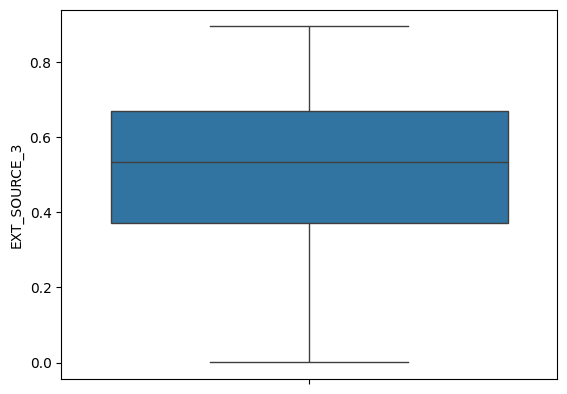

In [12]:
#visualizing missing values
sns.boxplot(ndf.EXT_SOURCE_3)
plt.show()

There are not many outlyers.

In [13]:
ndf.EXT_SOURCE_3.fillna(ndf.EXT_SOURCE_3.median(), inplace=True)
ndf.EXT_SOURCE_3.isnull().mean() * 100

np.float64(0.0)

In [14]:
ndf.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.535276    20.080908
0.746300     0.474780
0.713631     0.427627
0.694093     0.414945
0.670652     0.387303
0.652897     0.375271
0.581484     0.371044
0.689479     0.370068
0.595456     0.369418
0.554947     0.368117
0.621226     0.360638
0.657784     0.355109
0.607557     0.346979
0.643026     0.346654
0.450747     0.346004
0.626304     0.342752
0.673830     0.334947
0.651260     0.334622
0.511892     0.333647
0.706205     0.322590
0.553165     0.319989
0.593718     0.318037
0.634706     0.315111
0.740799     0.312509
0.681706     0.311859
0.565608     0.310883
0.728141     0.309908
0.771362     0.307956
0.576209     0.306656
0.586740     0.306331
0.656158     0.302753
0.631355     0.302103
0.484851     0.299827
0.709189     0.298851
0.665855     0.296575
0.538863     0.296250
0.684828     0.296250
0.617826     0.294949
0.591977     0.293973
0.579727     0.291046
0.683269     0.291046
0.513694     0.291046
0.000527     0.288120
0.733815     0.286169
0.619528     0.285843
0.501075     0.285843
0.508287     0.285193
0.754406     0.284217
0.712155     0.281941
0.832785     0.281291
0.558507     0.280966
0.524496     0.279665
0.633032     0.277714
0.659406     0.276413
0.812823     0.276088
0.636376     0.275762
0.474051     0.272185
0.680139     0.272185
0.647977     0.272185
0.394495     0.271535
0.546023     0.271535
0.695622     0.271210
0.547810     0.270234
0.612704     0.269584
0.477649     0.268933
0.722393     0.268933
0.819318     0.267958
0.574447     0.267958
0.627991     0.267308
0.520898     0.265031
0.549597     0.261779
0.609276     0.260804
0.544235     0.260804
0.616122     0.259828
0.517297     0.259178
0.622922     0.258853
0.531686     0.258202
0.454321     0.257552
0.646330     0.256251
0.528093     0.253975
0.600658     0.252674
0.506484     0.251698
0.669057     0.251373
0.598926     0.251048
0.551381     0.250723
0.441836     0.250723
0.542445     0.248772
0.567379     0.247796
0.590233     0.247796
0.470456     0.243569
0.780144     0.242593
0.629674     0.242593
0.614414     0.241617
0.577969     0.240317
0.427657     0.239016
0.678568     0.238040
0.417100     0.237390
0.729567     0.237065
0.497469     0.236739
0.610991     0.236414
0.465069     0.236089
0.401407     0.235764
0.479449     0.234463
0.515495     0.234138
0.562060     0.232512
0.526295     0.232512
0.749022     0.231536
0.457900     0.231211
0.798137     0.230886
0.707699     0.230886
0.597192     0.230236
0.588488     0.229585
0.718033     0.228610
0.584990     0.227959
0.438281     0.227634
0.639708     0.227309
0.604113     0.226333
0.700184     0.226333
0.605836     0.225358
0.572683     0.225358
0.468660     0.225033
0.719491     0.224707
0.540654     0.223407
0.431192     0.223407
0.368969     0.223081
0.522697     0.223081
0.377404     0.223081
0.420611     0.220480
0.436506     0.220155
0.459690     0.218204
0.766234     0.217553
0.492060     0.217228
0.672243     0.216903
0.563835     0.216903
0.493863     0.216252
0.533482     0.215927
0.396220     0.214301
0.519097     0.213976
0.481249     0.213976
0.408359     0.213001
0.537070     0.213001
0.432962     0.212675
0.495666     0.212350
0.424130     0.212350
0.461482     0.211049
0.661024     0.210724
0.782608     0.210724
0.355639     0.210724
0.483050     0.210399
0.486653     0.210074
0.499272     0.209749
0.510090     0.209749
0.411849     0.209423
0.638044     0.208773
0.475850     0.208773
0.472253     0.208123
0.556727     0.207797
0.692559     0.204871
0.786267     0.204220
0.502878     0.203570
0.761026     0.203570
0.504681     0.202920
0.443615     0.202920
0.641368     0.202920
0.703203     0.201619
0.448962     0.201294
0.434733     0.200643
0.397946     0.199993
0.370650     0.199017
0.560284     0.198692
0.529890     0.198367
0.399676     0.197717
0.490258     0.196741
0.583238     0.196741
0.654529     0.196416
0.360613     0.196091
0.410103     0.195440
0.463275     0.195115
0.447179     0.194465
0.429424     0.194465
0.570917     0.194465
0.353

In [15]:
null_cols = list(ndf.isna().any())
len(null_cols)

73

Handling columns with 13% missing Data

In [16]:
ndf.isnull().mean() * 100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
OCCUPATION_TYPE                 0.000000
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
EXT_SOURCE_2                    0.214626
EXT_SOURCE_3                    0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_21                0.000000
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
dtype: float64

In [17]:
ndf.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

In [18]:
ndf.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: proportion, dtype: float64

In [19]:
ndf.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: proportion, dtype: float64

In [20]:
ndf.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_MON
0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
23.0     0.000376
27.0     0.000376
22.0     0.000376
Name: proportion, dtype: float64

In [21]:
ndf.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_QRT
0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
8.0       0.002632
7.0       0.002632
261.0     0.000376
19.0      0.000376
Name: proportion, dtype: float64

In [22]:
ndf.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
18.0     0.001504
19.0     0.001504
16.0     0.001128
25.0     0.000376
23.0     0.000376
22.0     0.000376
21.0     0.000376
20.0     0.000376
Name: proportion, dtype: float64

So, most of these columns have a very polarized data execpt for "AMT_REQ_CREDIT_BUREAU_YEAR". The other columns have 99-80% values as 0 so we will impute these columns with 0 and for "AMT_REQ_CREDIT_BUREAU_YEAR" we will use mean.

In [23]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_QRT']

In [24]:
for col in cols:
    ndf[col].fillna(ndf[col].mode()[0], inplace=True)

In [25]:
#experiments
# gdf = ndf[["AMT_REQ_CREDIT_BUREAU_YEAR"]].copy()
# gdf["AMT_REQ_CREDIT_BUREAU_YEAR"] = gdf["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(gdf["AMT_REQ_CREDIT_BUREAU_YEAR"].mean())
# gdf.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)*100

In [26]:
ndf["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(ndf["AMT_REQ_CREDIT_BUREAU_YEAR"].mode()[0], inplace=True)

In [27]:
ndf.isnull().mean() * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000
OCCUPATION_TYPE                0.000000
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                   0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_13               0.000000
FLAG_DOCUMENT_14               0.000000
FLAG_DOCUMENT_15               0.000000
FLAG_DOCUMENT_16               0.000000
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_21               0.000000
AMT_REQ_CREDIT_BUREAU_HOUR     0.000000
AMT_REQ_CREDIT_BUREAU_DAY      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
dtype: float64

Based on This we can easily say that our data now has very less amount of missing data and the columns with ~13% missing data is now sorted. The special "AMT_REQ_CREDIT_BUREAU_YEAR" is also imputed with the mean values (may have changed the distribution a lil bit).

Now handling columns with less than 1% missing data

In [28]:
null_cols = list(ndf.columns[ndf.isna().any()])
len(null_cols)

10

In [29]:
ndf.NAME_TYPE_SUITE.value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: proportion, dtype: float64

In [30]:
ndf.EXT_SOURCE_2.value_counts(normalize=True)*100

Output hidden; open in https://colab.research.google.com to view.

In [31]:
ndf.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

OBS_30_CNT_SOCIAL_CIRCLE
0.0      53.479722
1.0      15.916669
2.0       9.725603
3.0       6.630559
4.0       4.614506
5.0       3.116904
6.0       2.105452
7.0       1.432347
8.0       0.968058
9.0       0.653529
10.0      0.448954
11.0      0.277986
12.0      0.212731
13.0      0.134099
14.0      0.084179
15.0      0.054162
16.0      0.043395
17.0      0.028712
18.0      0.015009
19.0      0.014356
20.0      0.009788
21.0      0.009462
22.0      0.007178
23.0      0.004894
25.0      0.003589
24.0      0.003589
27.0      0.001631
26.0      0.000979
30.0      0.000653
29.0      0.000326
28.0      0.000326
47.0      0.000326
348.0     0.000326
Name: proportion, dtype: float64

For categorical column impute missiing values with mode and for numerical columns missing values with median.

In [32]:
ndf.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(ndf.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0], inplace=True)

In [33]:
ndf.DAYS_LAST_PHONE_CHANGE.fillna(ndf.DAYS_LAST_PHONE_CHANGE.mode()[0], inplace=True)

In [34]:
ndf.CNT_FAM_MEMBERS.fillna(ndf.CNT_FAM_MEMBERS.mode()[0], inplace=True)
ndf.isnull().mean() * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000
OCCUPATION_TYPE                0.000000
CNT_FAM_MEMBERS                0.000000
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                   0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_13               0.000000
FLAG_DOCUMENT_14               0.000000
FLAG_DOCUMENT_15               0.000000
FLAG_DOCUMENT_16               0.000000
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_21               0.000000
AMT_REQ_CREDIT_BUREAU_HOUR     0.000000
AMT_REQ_CREDIT_BUREAU_DAY      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
dtype: float64

Convert negative values to +ve in Days variable

In [35]:
ndf.DAYS_BIRTH = ndf.DAYS_BIRTH.apply(lambda x: abs(x))
ndf.DAYS_EMPLOYED = ndf.DAYS_EMPLOYED.apply(lambda x: abs(x))
ndf.DAYS_REGISTRATION = ndf.DAYS_REGISTRATION.apply(lambda x: abs(x))
ndf.DAYS_ID_PUBLISH = ndf.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
ndf.DAYS_LAST_PHONE_CHANGE = ndf.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

In [36]:
#binning of continuous variables
ndf["YEARS_BIRTH"] = ndf.DAYS_BIRTH.apply(lambda x: int(x // 365))
ndf["YEARS_EMPLOYED"] = ndf.DAYS_EMPLOYED.apply(lambda x: int(x // 365))
ndf["YEARS_REGISTRATION"] = ndf.DAYS_REGISTRATION.apply(lambda x: int(x // 365))
ndf["YEARS_ID_PUBLISH"] = ndf.DAYS_ID_PUBLISH.apply(lambda x: int(x // 365))
ndf["YEARS_LAST_PHONE_CHANGE"] = ndf.DAYS_LAST_PHONE_CHANGE.apply(lambda x: int(x // 365))



In [37]:
#binning of amount credit columns
ndf["AMT_CREDIT_BINNED"] = pd.cut(
    ndf.AMT_CREDIT.fillna(-1),  # So NaNs are in a separate bin
    bins=[-2, 200000, 500000, 1000000, 2000000, np.inf],
    labels=['Very Low Credit', 'Low Credit', 'Medium Credit', 'High Credit', 'Very High Credit']
)

In [38]:
ndf.AMT_CREDIT_BINNED.value_counts(normalize=True) * 100

AMT_CREDIT_BINNED
Low Credit          36.808114
Medium Credit       35.183457
High Credit         15.594889
Very Low Credit     11.753726
Very High Credit     0.659814
Name: proportion, dtype: float64

In [39]:
ndf["AMT_CREDIT_BINNED"] = ndf["AMT_CREDIT_BINNED"].astype('category')


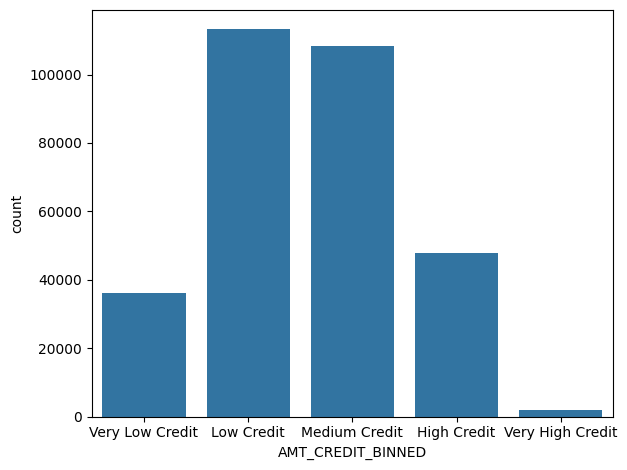

In [40]:
sns.countplot(x=ndf["AMT_CREDIT_BINNED"])
plt.tight_layout()
plt.show()


In [41]:
ndf["AGE_CATEGORY"] = pd.cut(ndf.YEARS_BIRTH, bins=[0, 25, 45, 65, 95],
                            labels=['Young', 'Middle-Aged', 'Senior', 'Elderly'])

In [42]:
ndf.AGE_CATEGORY.value_counts(normalize=True) * 100

AGE_CATEGORY
Middle-Aged    51.901233
Senior         41.163406
Young           5.306477
Elderly         1.628885
Name: proportion, dtype: float64

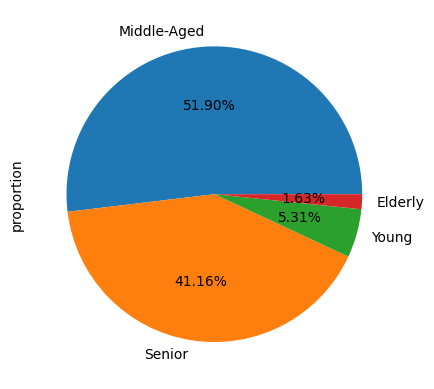

In [43]:

ndf["AGE_CATEGORY"].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.show()

Dividing Application data in 2 parts based on target variable

In [44]:
tar_0 = ndf[ndf.TARGET == 0]
tar_1 = ndf[ndf.TARGET == 1]

In [45]:
ndf.TARGET.value_counts(normalize=True) * 100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

Conclusion: almost 1 out of 9 applicants are default

Univariate Analysis starts here

In [46]:
cat_cols= list(ndf.columns[ndf.dtypes == object])
num_cols= list(ndf.columns[ndf.dtypes == np.int64]) + list(ndf.columns[ndf.dtypes == np.float64])
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


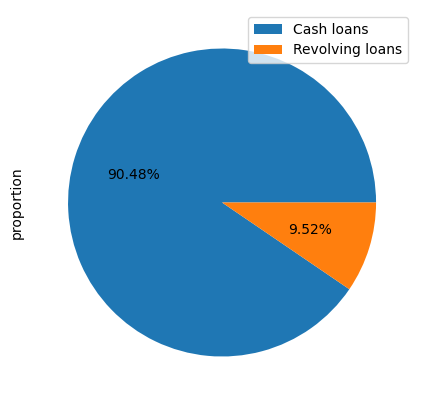

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


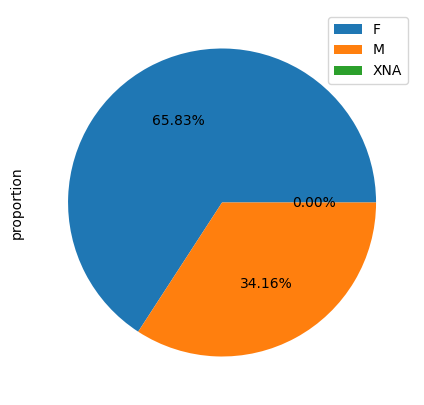

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


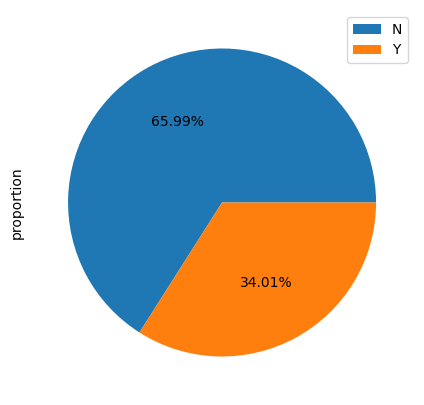

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


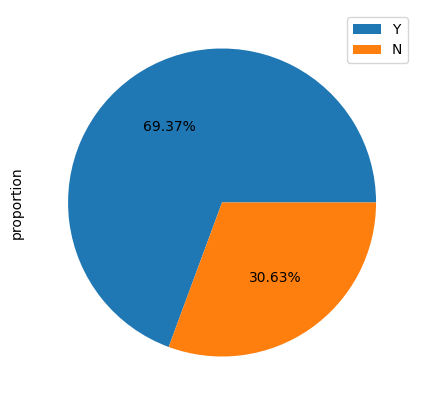

NAME_TYPE_SUITE
Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: proportion, dtype: float64


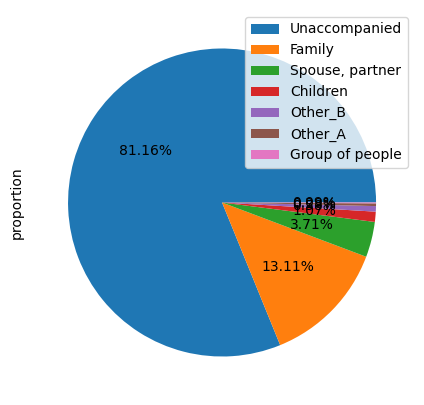

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


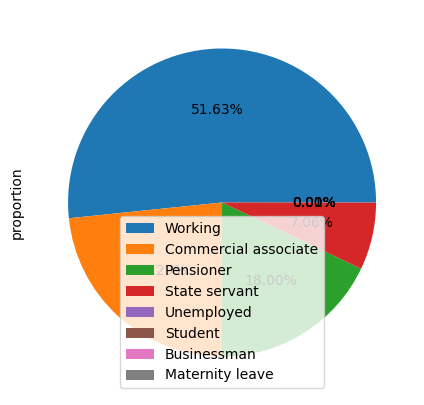

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


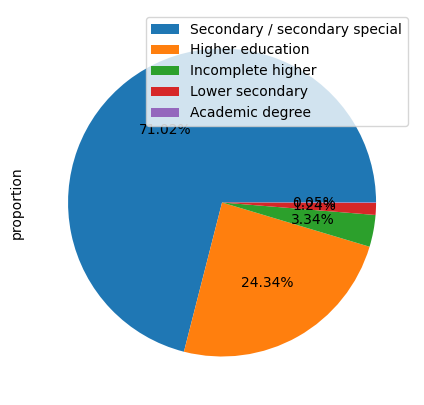

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


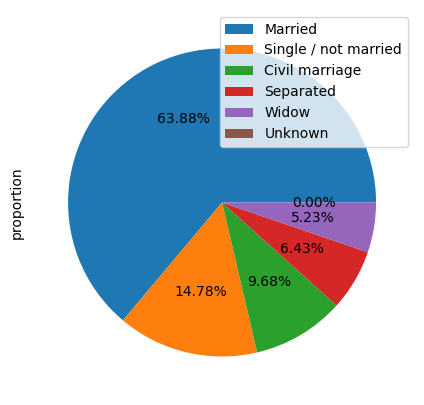

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


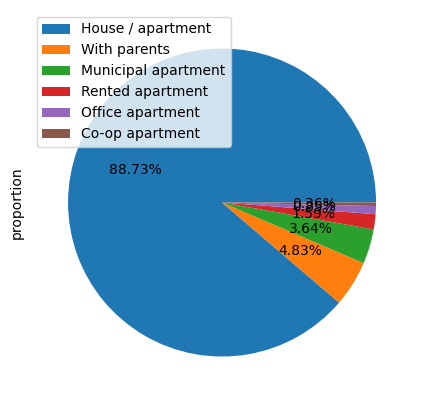

OCCUPATION_TYPE
Other                    0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


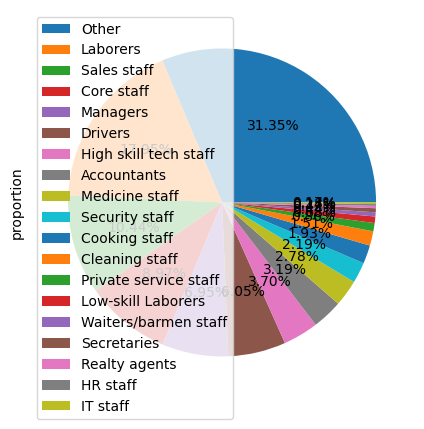

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


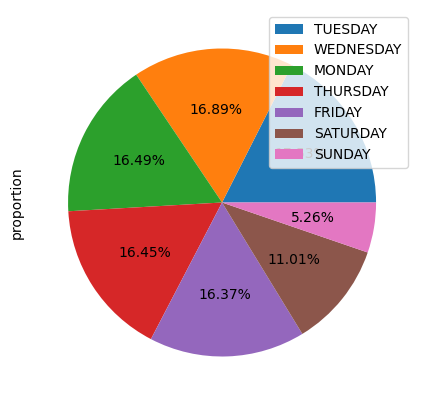

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

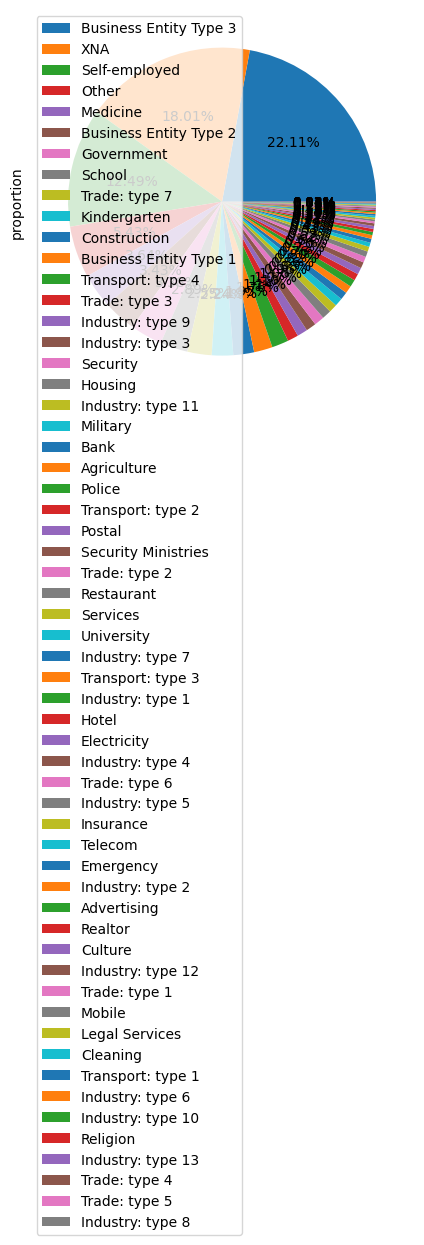

In [47]:
for col in cat_cols:
  print(ndf[col].value_counts(normalize=True))
  plt.figure(figsize=[5,5])
  ndf[col].value_counts(normalize=True).plot.pie(labeldistance=None, autopct='%1.2f%%')
  plt.legend()
  plt.show()

In [48]:
num_cols_without_flags= []
num_cols_with_flags =[]
for col in num_cols:
  if col.startswith("FLAG"):
    num_cols_with_flags.append(col)
  else:
    num_cols_without_flags.append(col)

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


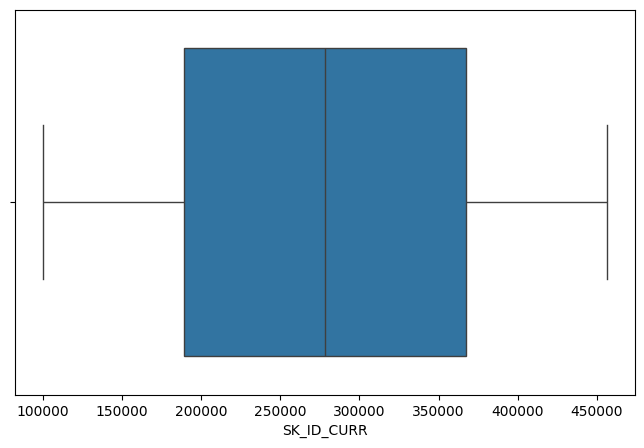

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


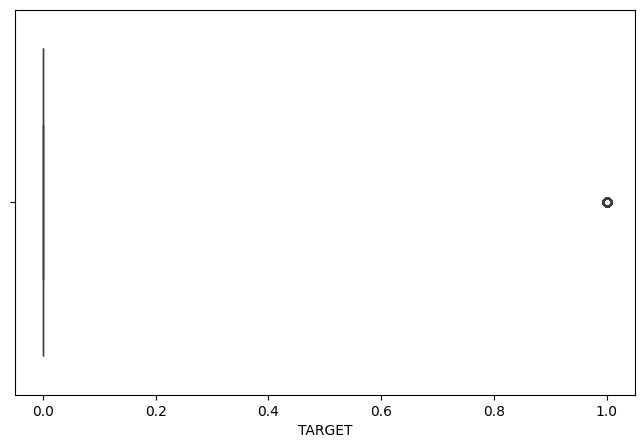

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


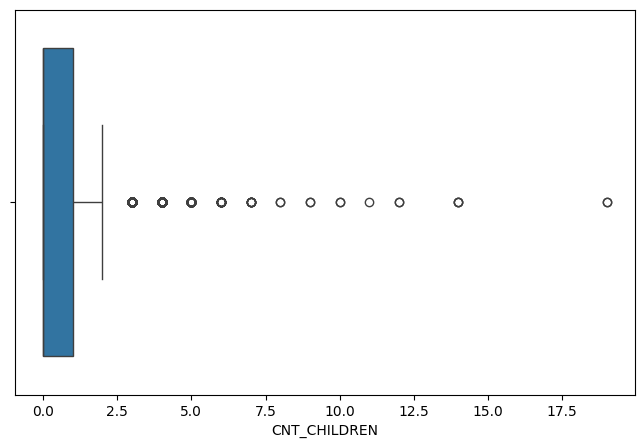

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


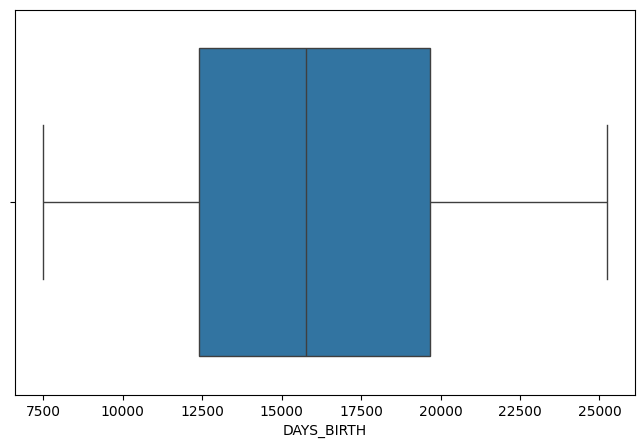

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


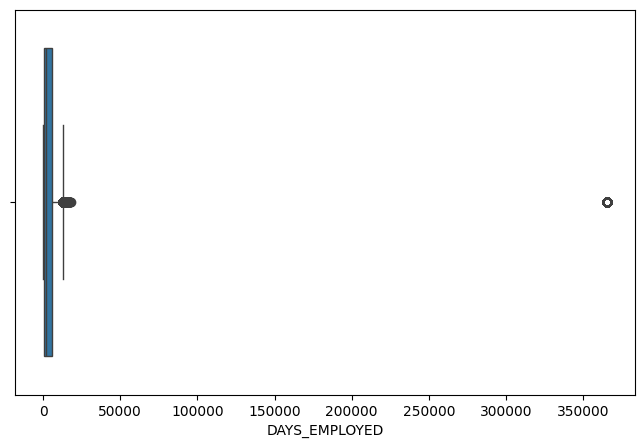

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


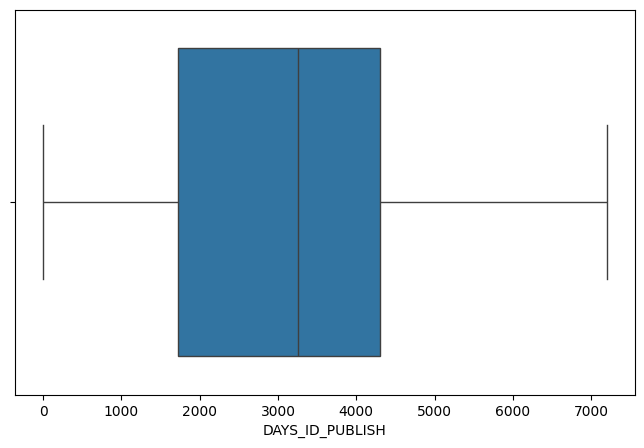

count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


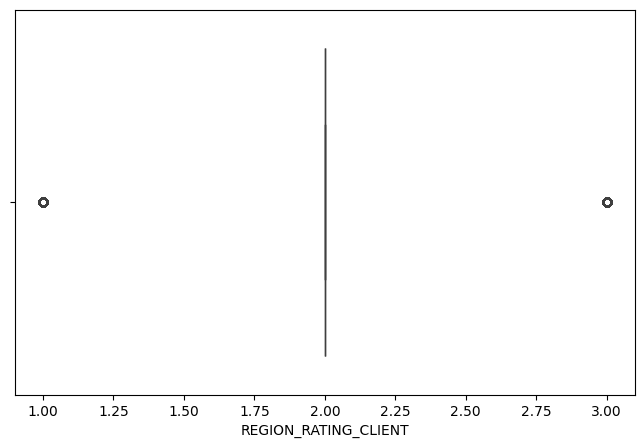

count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


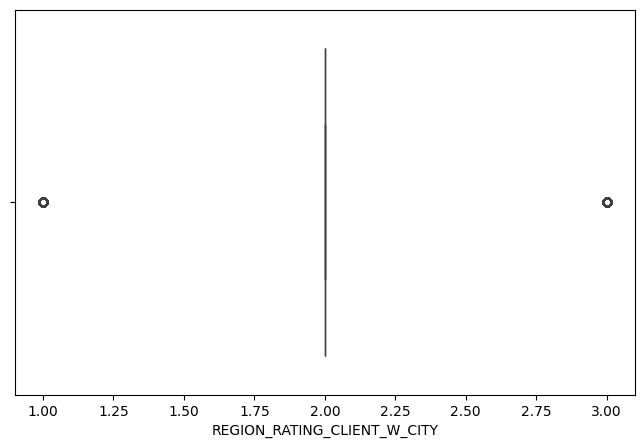

count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


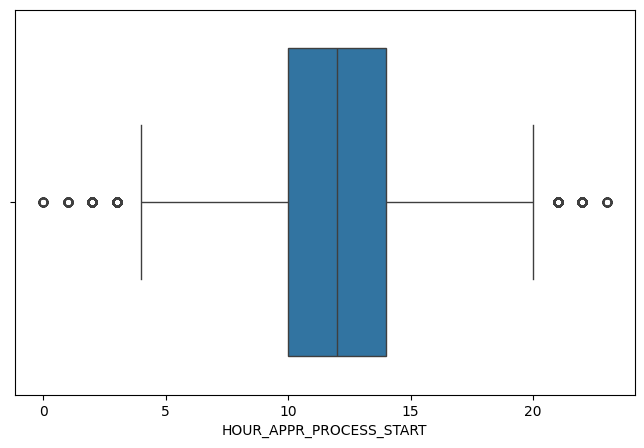

count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


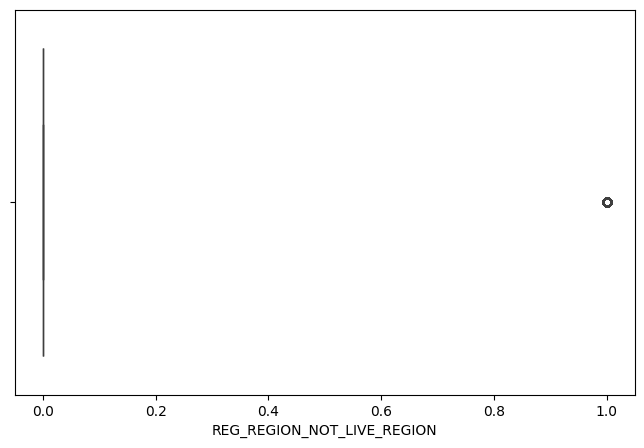

count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


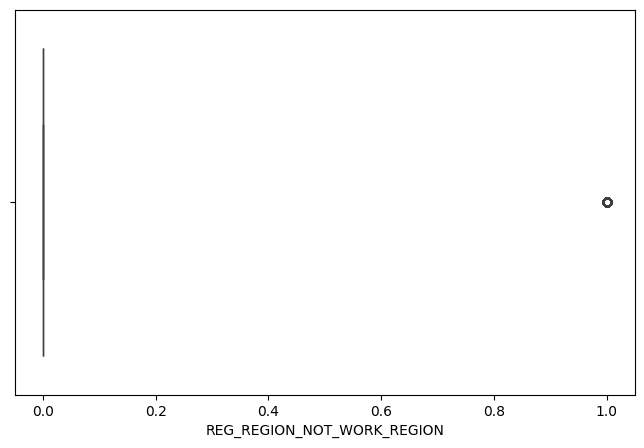

count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


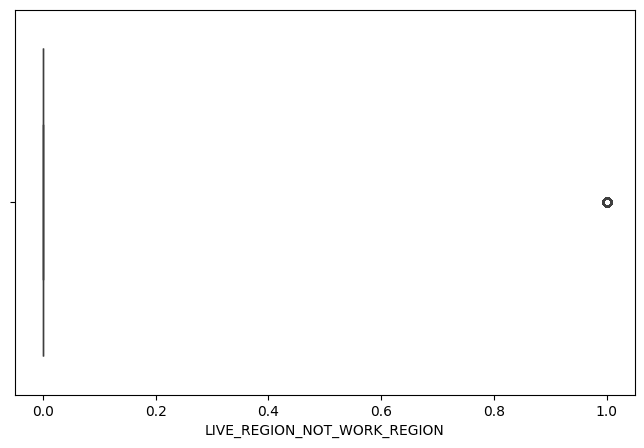

count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


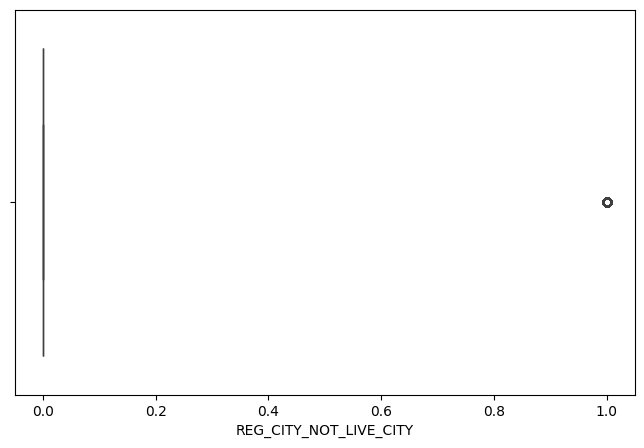

count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


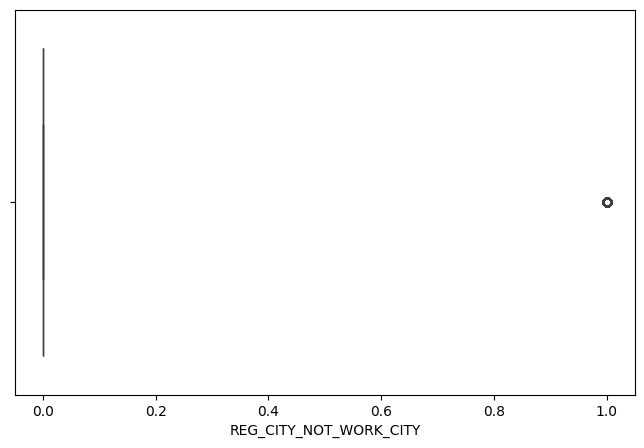

count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


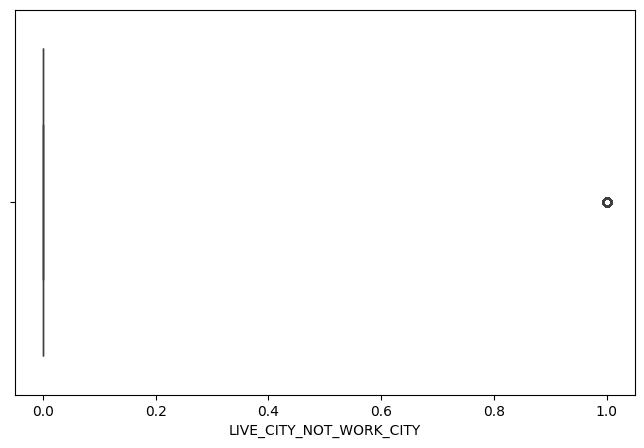

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


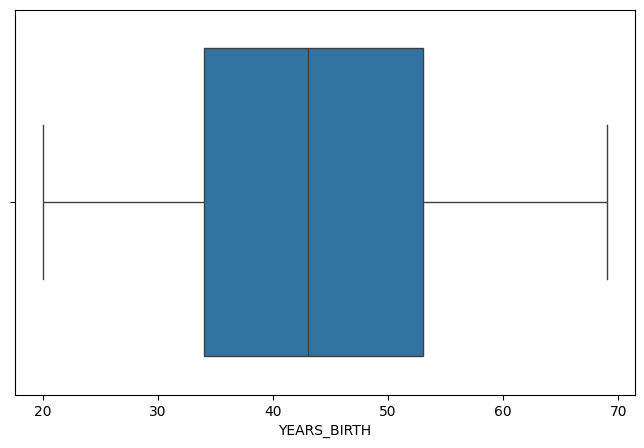

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64


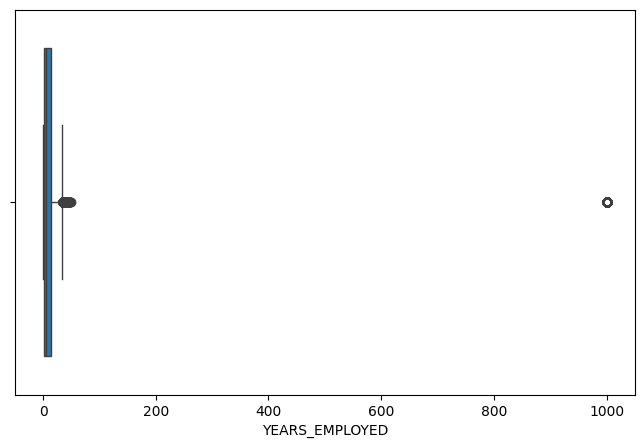

count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64


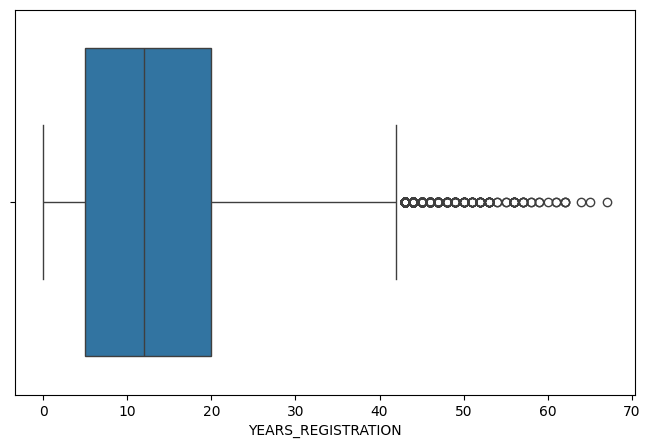

count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS_ID_PUBLISH, dtype: float64


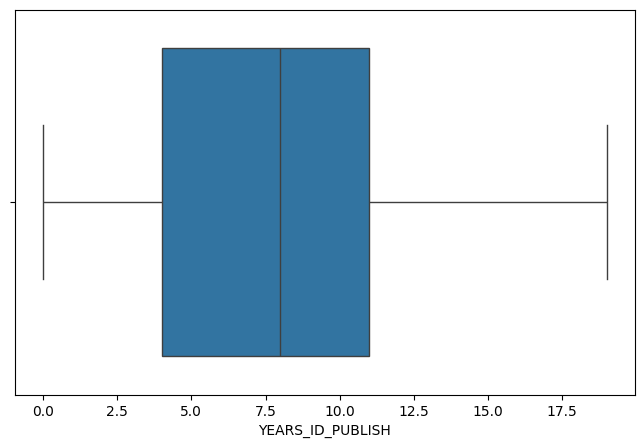

count    307511.000000
mean          2.225107
std           2.193678
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


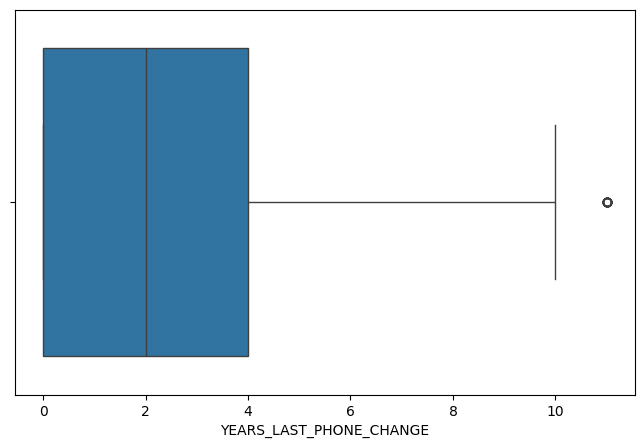

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


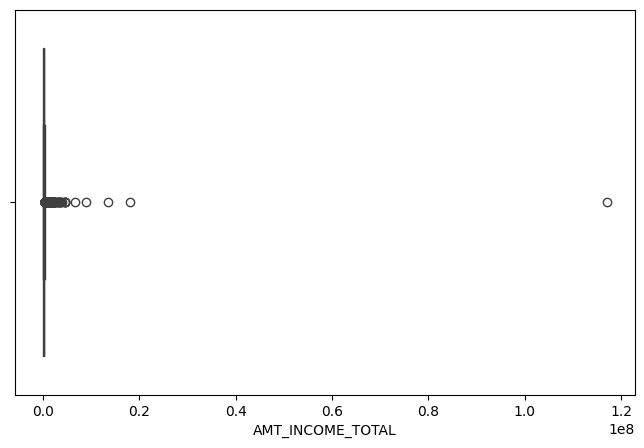

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


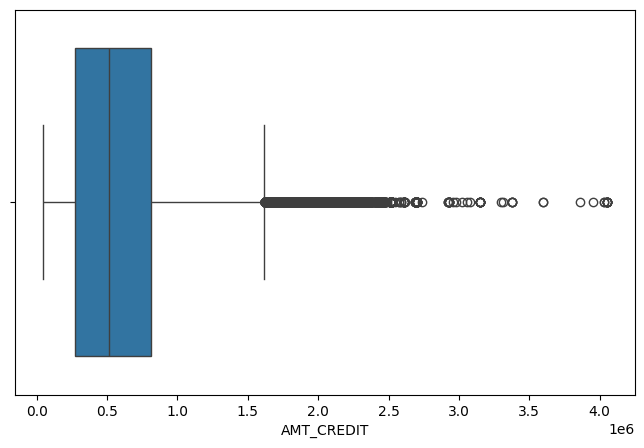

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


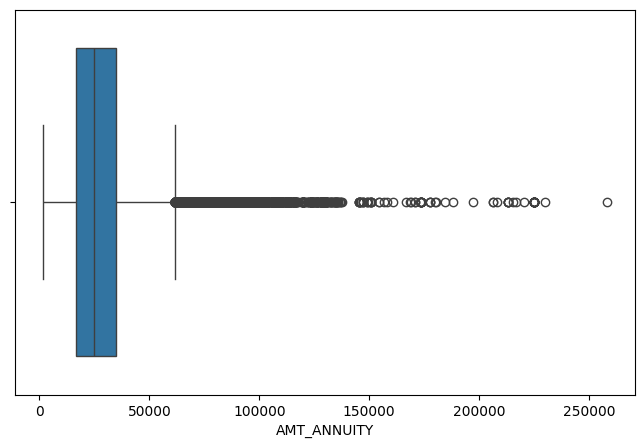

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


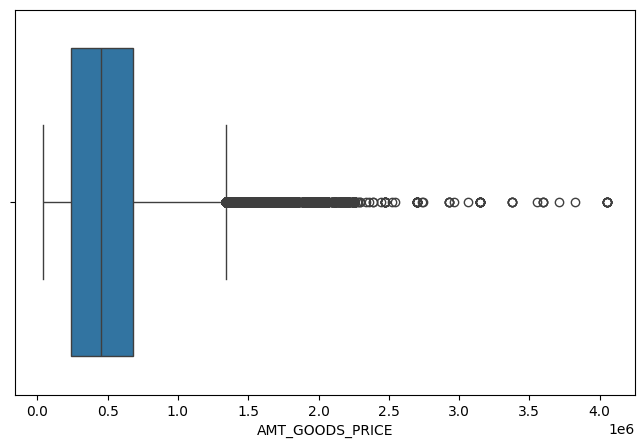

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


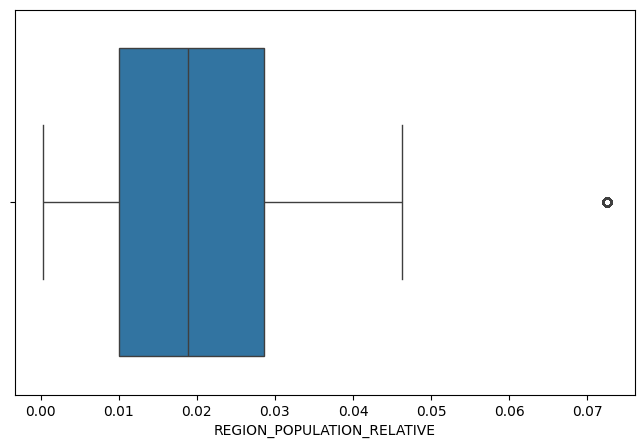

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


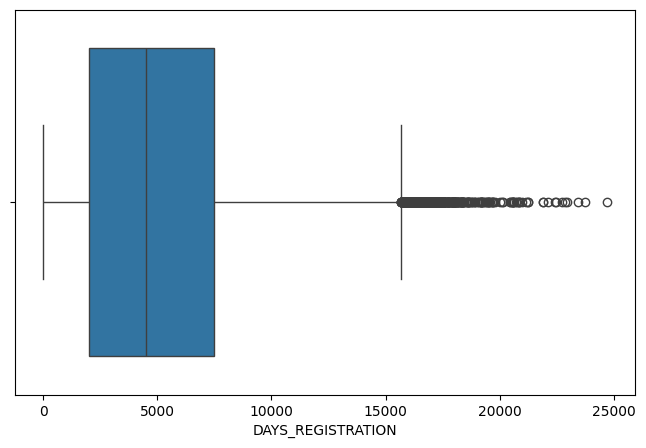

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


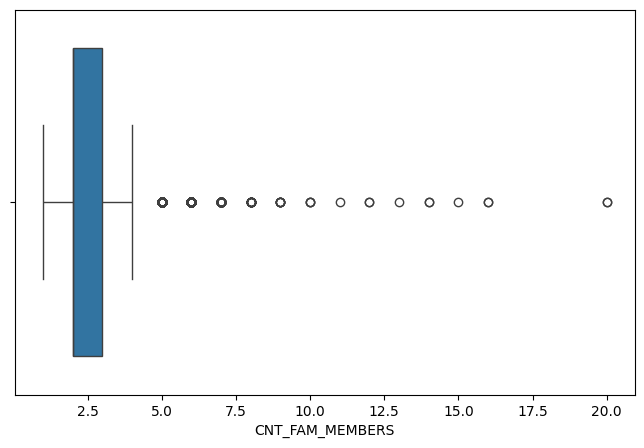

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


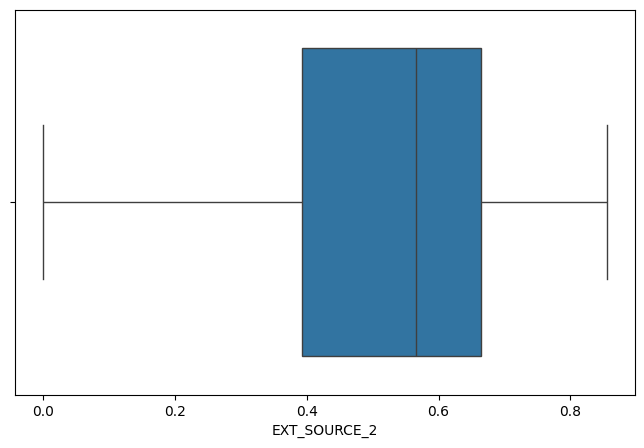

count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


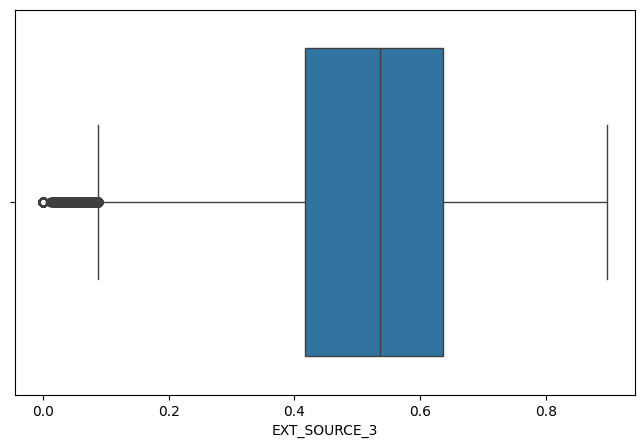

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


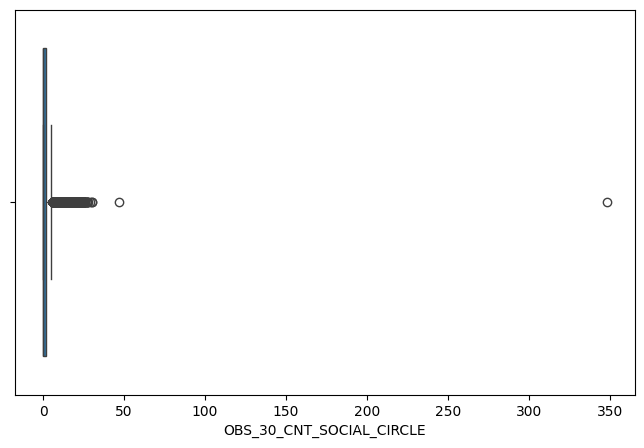

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


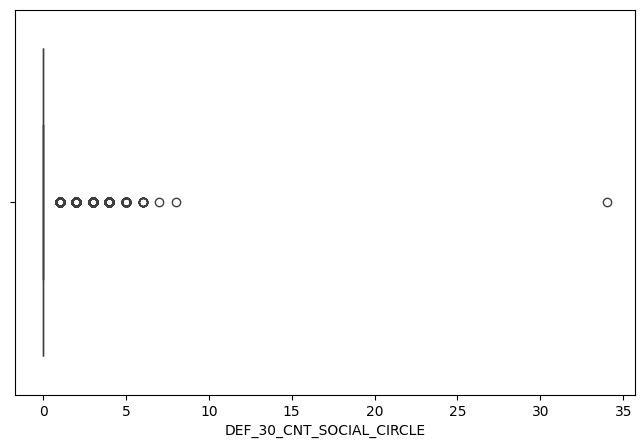

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


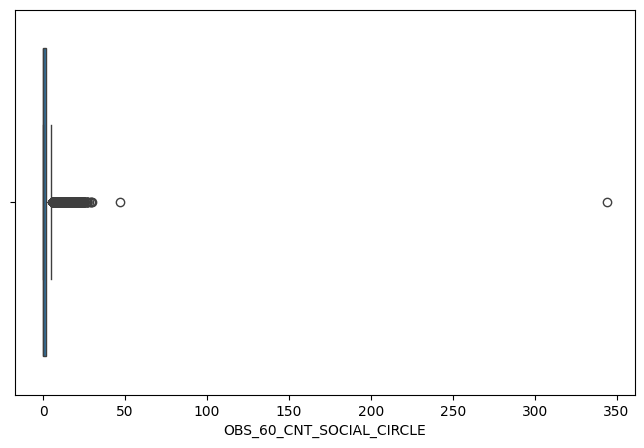

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


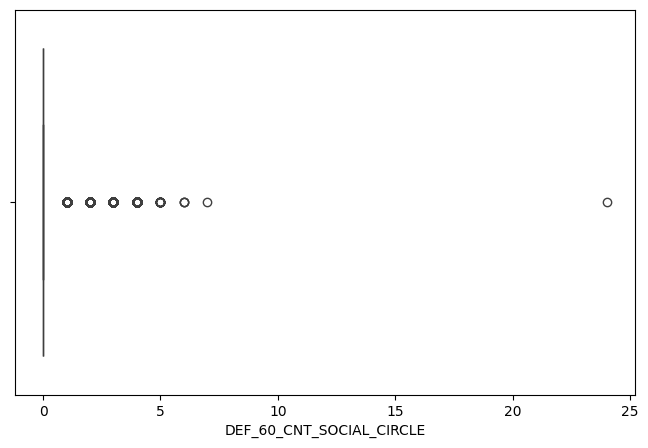

count    307511.000000
mean        962.855657
std         826.808966
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


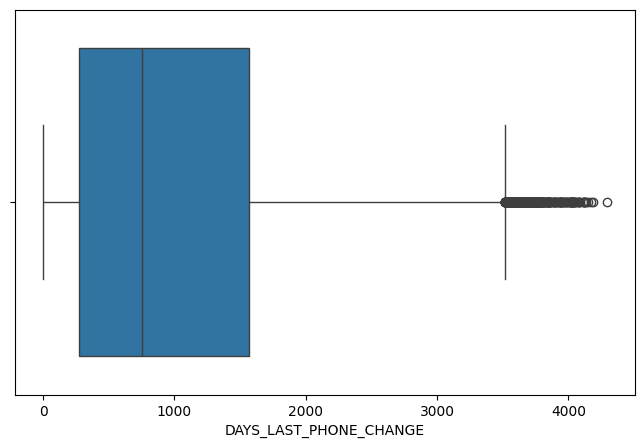

count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


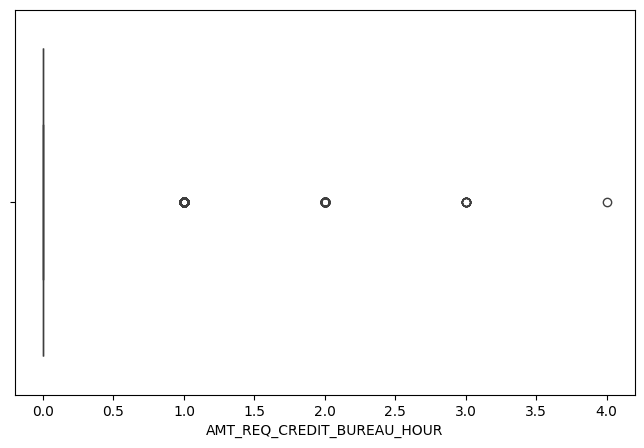

count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


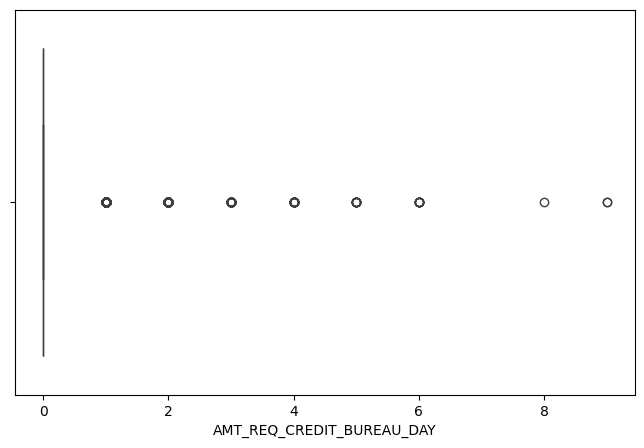

count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


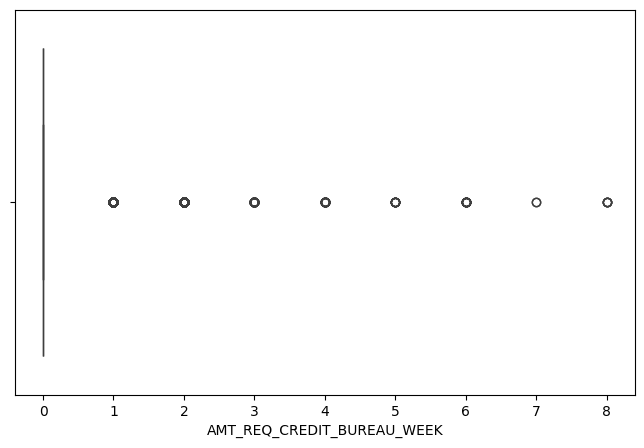

count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


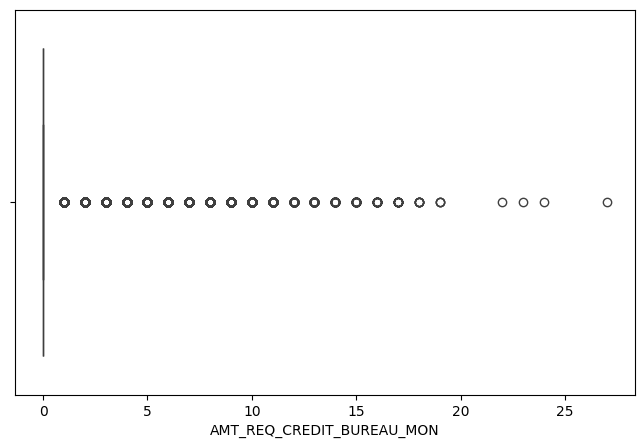

count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


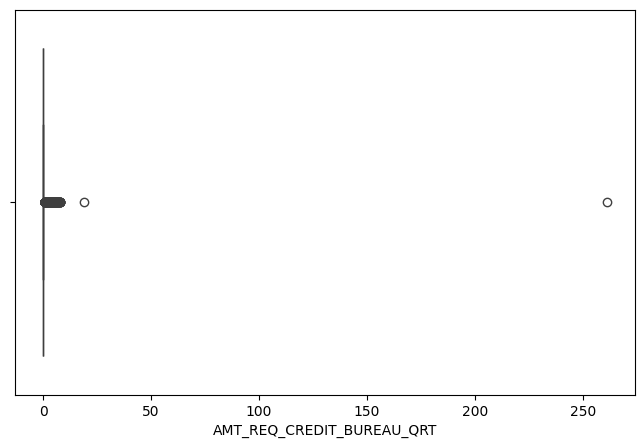

count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


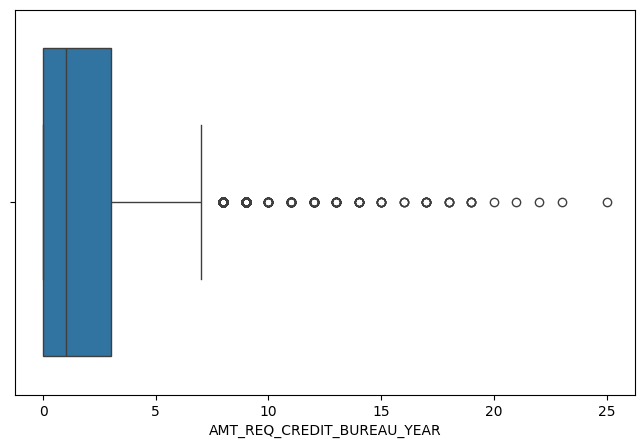

In [49]:
for col in num_cols_without_flags:
  print(ndf[col].describe())
  plt.figure(figsize=[8,5])
  sns.boxplot(data=ndf,x=col)
  plt.show()

#NGL I always had hardtime understanding the boxplots

plot on NAME_CONTRACT_TYPE for target 0 and 1


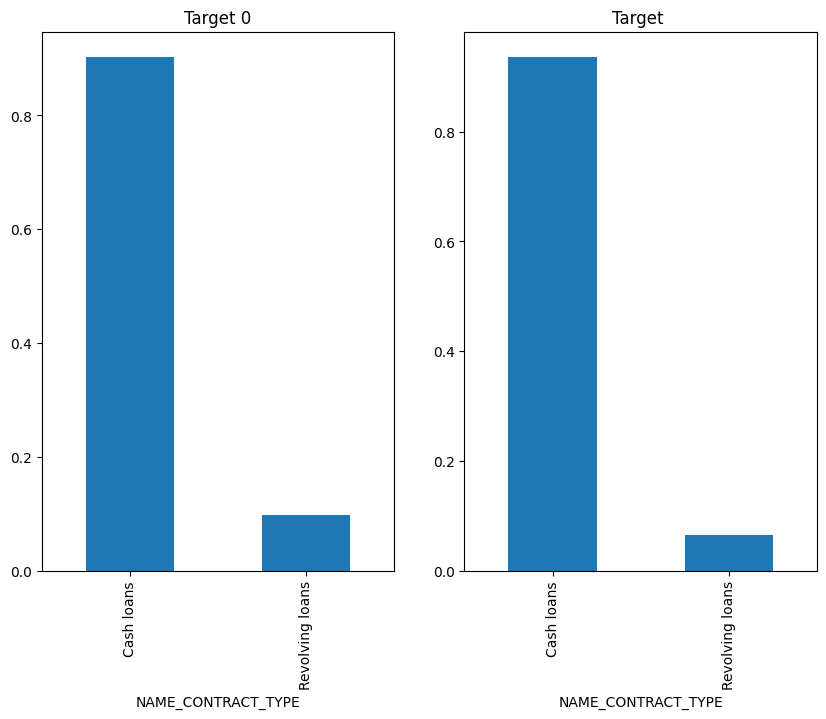

plot on CODE_GENDER for target 0 and 1


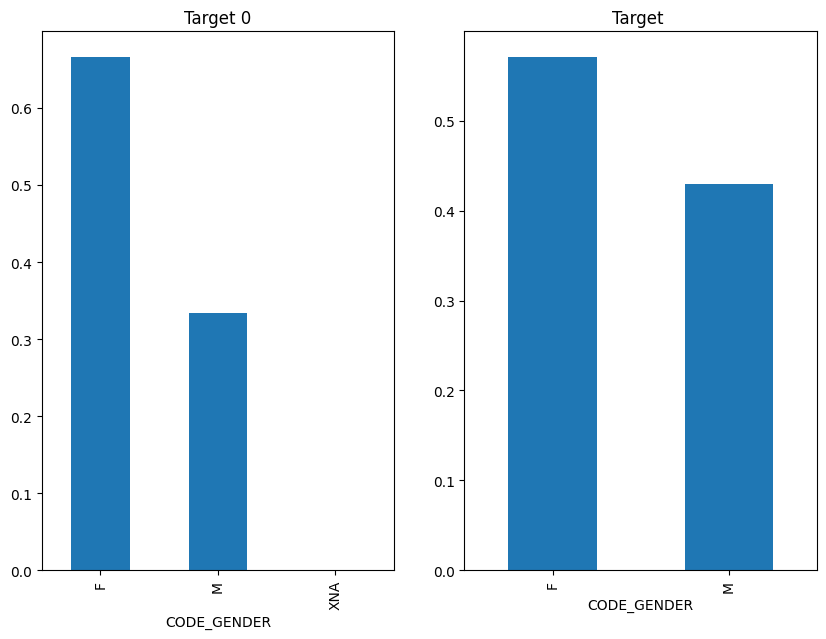

plot on FLAG_OWN_CAR for target 0 and 1


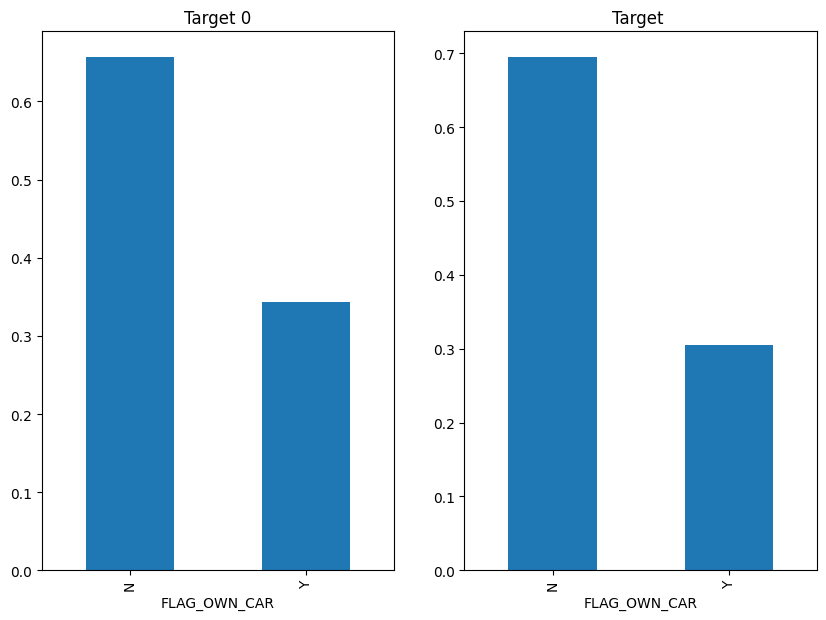

plot on FLAG_OWN_REALTY for target 0 and 1


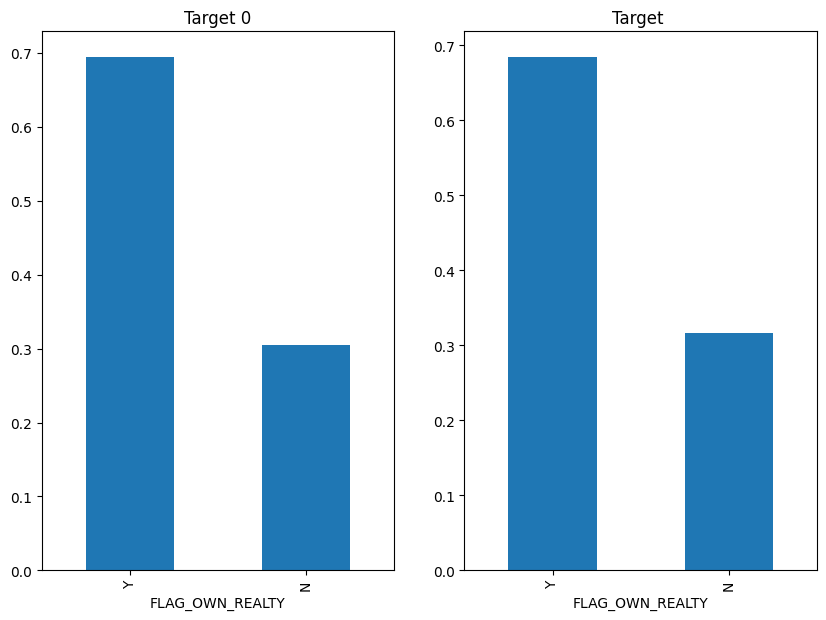

plot on NAME_TYPE_SUITE for target 0 and 1


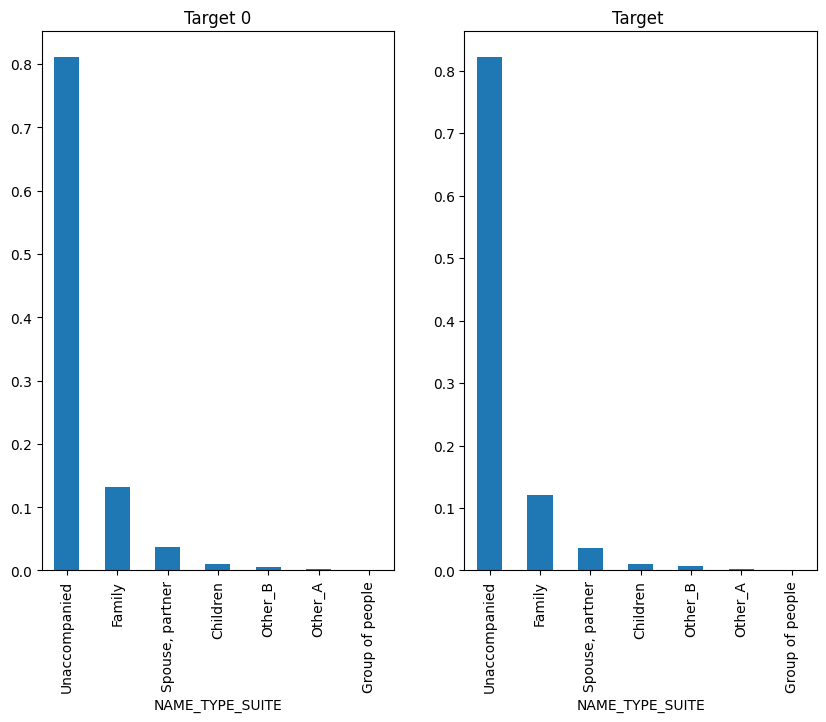

plot on NAME_INCOME_TYPE for target 0 and 1


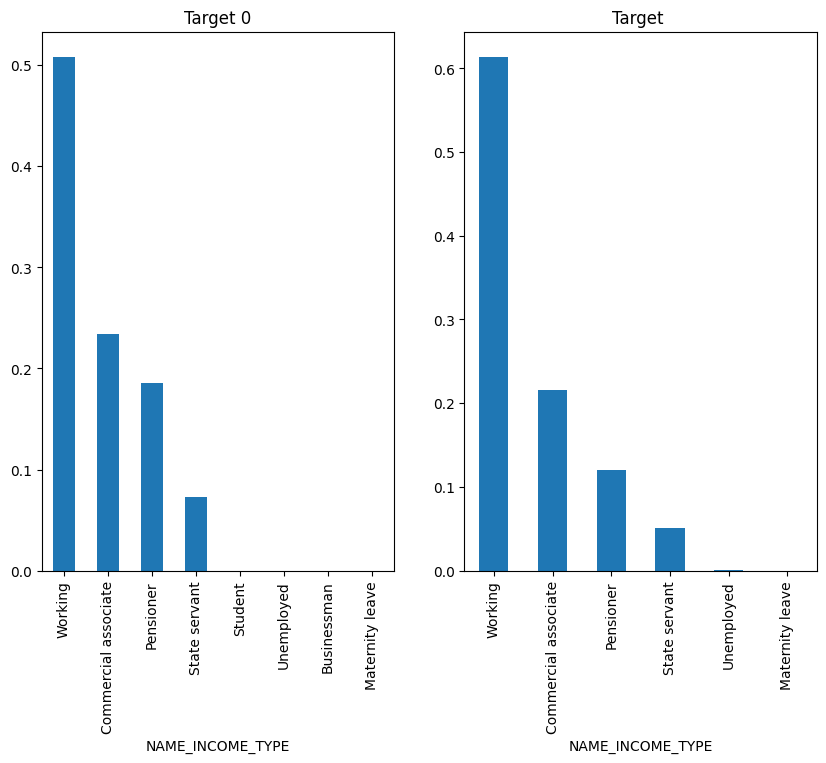

plot on NAME_EDUCATION_TYPE for target 0 and 1


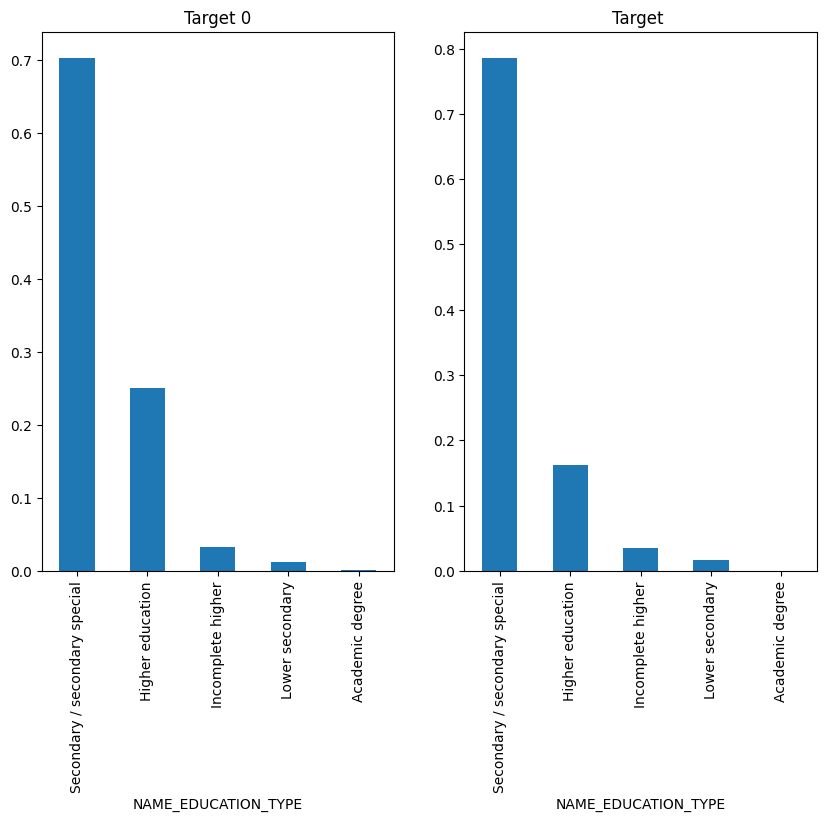

plot on NAME_FAMILY_STATUS for target 0 and 1


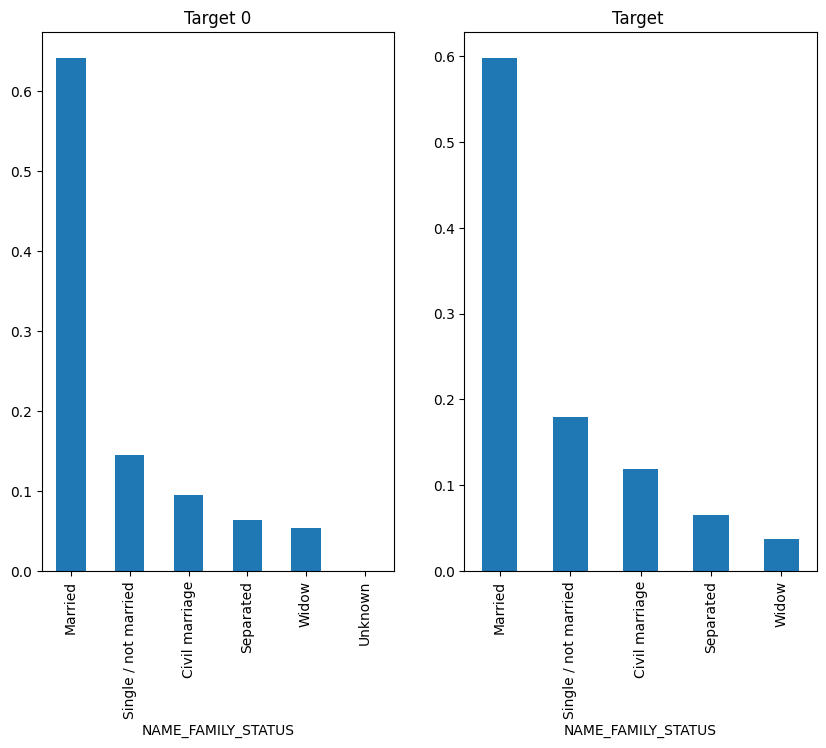

plot on NAME_HOUSING_TYPE for target 0 and 1


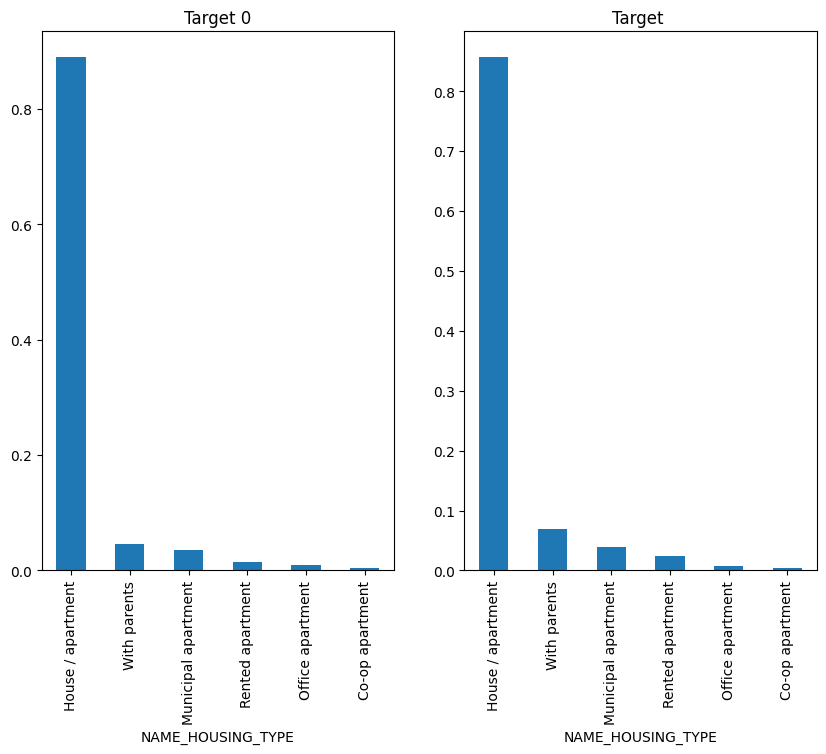

plot on OCCUPATION_TYPE for target 0 and 1


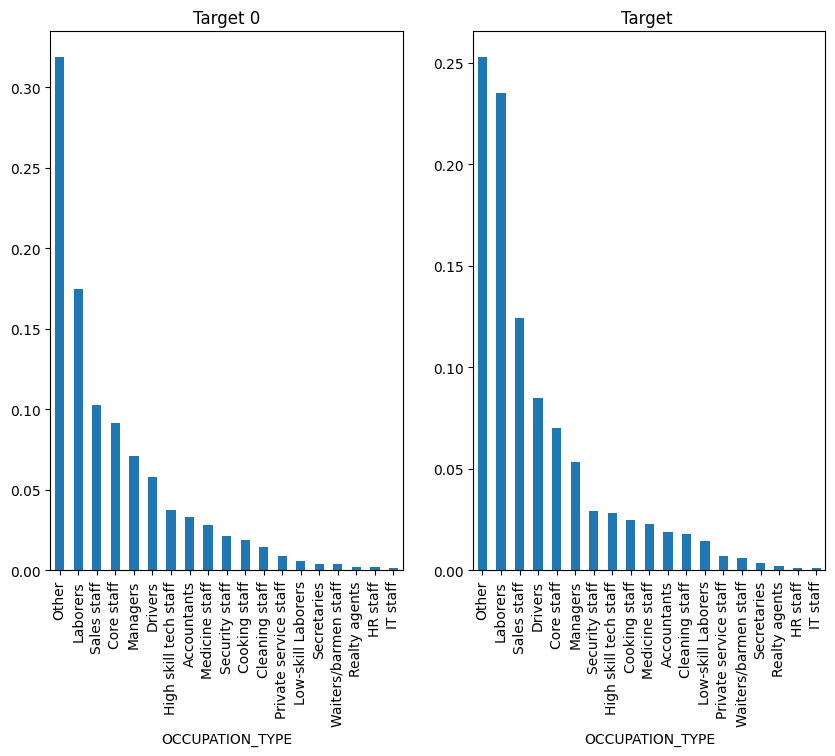

plot on WEEKDAY_APPR_PROCESS_START for target 0 and 1


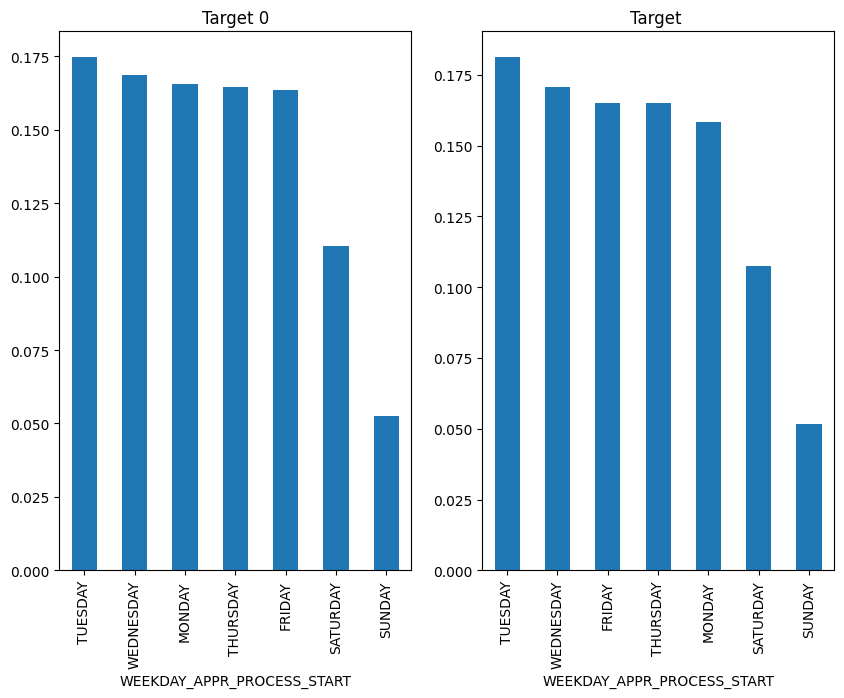

plot on ORGANIZATION_TYPE for target 0 and 1


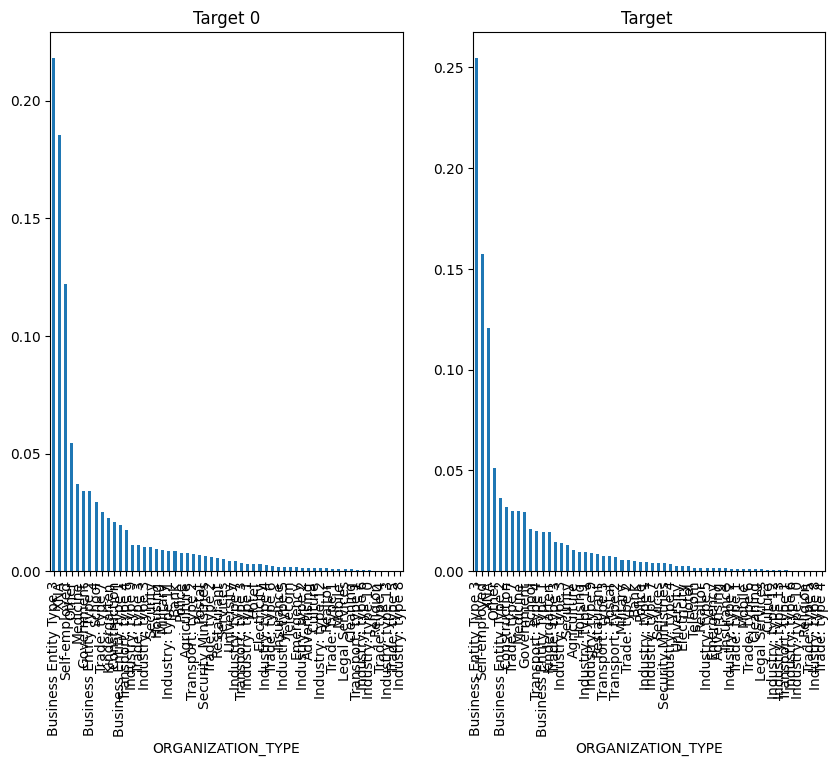

In [50]:
for col in cat_cols:
  print(f"plot on {col} for target 0 and 1")
  plt.figure(figsize=[10,7])
  plt.subplot(1,2,1)
  tar_0[col].value_counts(normalize=True).plot.bar()
  plt.title("Target 0")
  plt.xlabel(col)
  plt.subplot(1,2,2)
  tar_1[col].value_counts(normalize=True).plot.bar()
  plt.title("Target ")
  plt.xlabel(col)
  plt.show()

#Bivariate and multivariate analysis

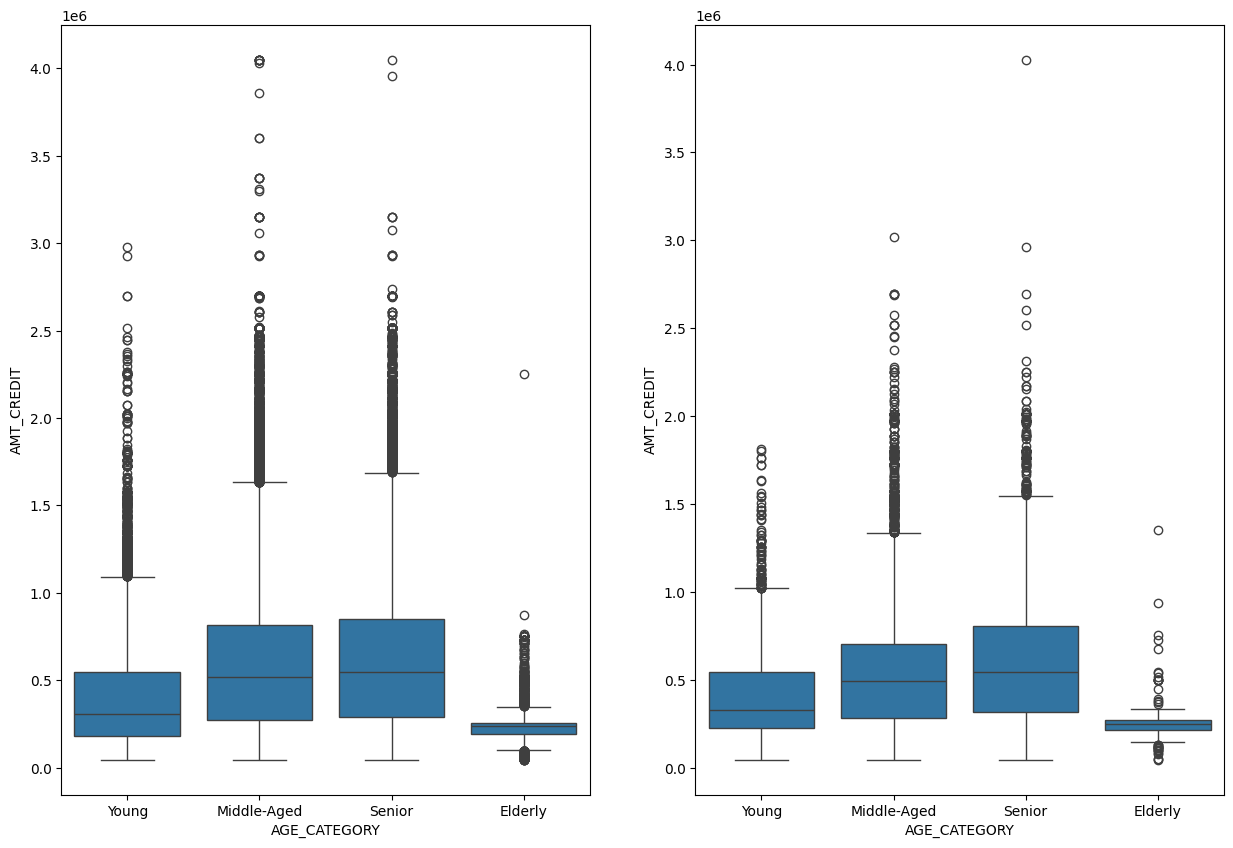

In [51]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x='AGE_CATEGORY', y='AMT_CREDIT', data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='AGE_CATEGORY', y='AMT_CREDIT', data=tar_1)
plt.show()

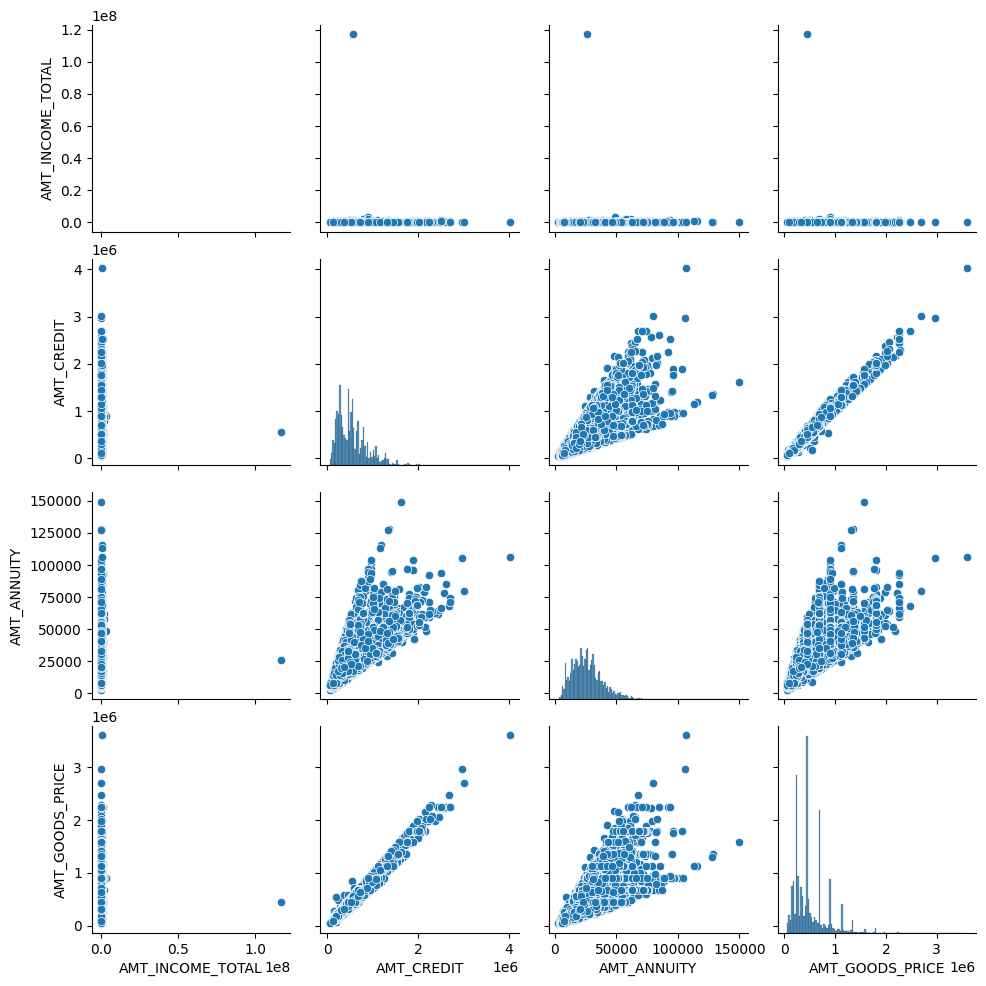

In [52]:
sns.pairplot(tar_1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]])
plt.show()

1. AMT_CREDIT and AMT_GOODS_PRICE are very linearly related.
2. AMT_INCOME_TOTAL seems to have almost no affect on the other factors.
3. AMT_ANNUITY and AMT_GOODS_PRICE also have a sort of linear relation not as strict as that of point 1


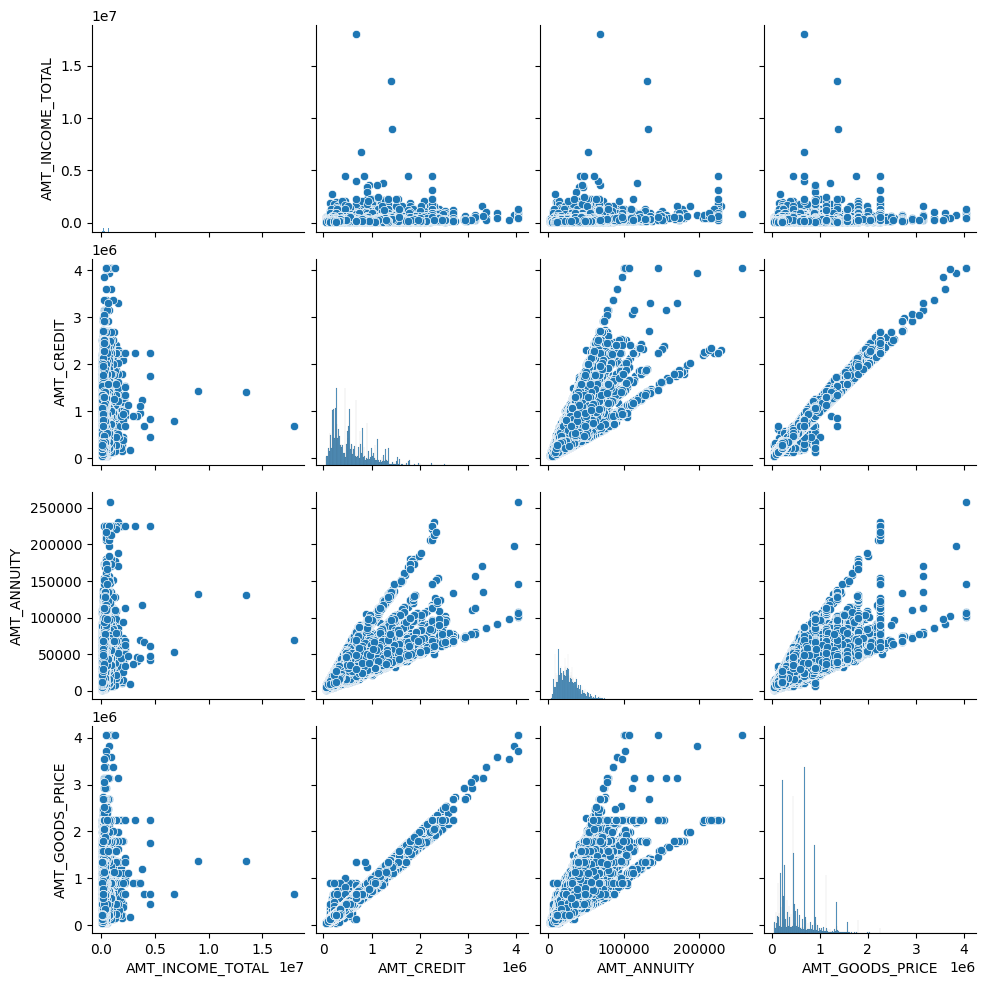

In [53]:
sns.pairplot(tar_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]])
plt.show()

1. AMT_CREDIT and AMT_GOODS_PRICE are very linearly related.
2. AMT_INCOME_TOTAL seems to have almost no affect on the other factors.

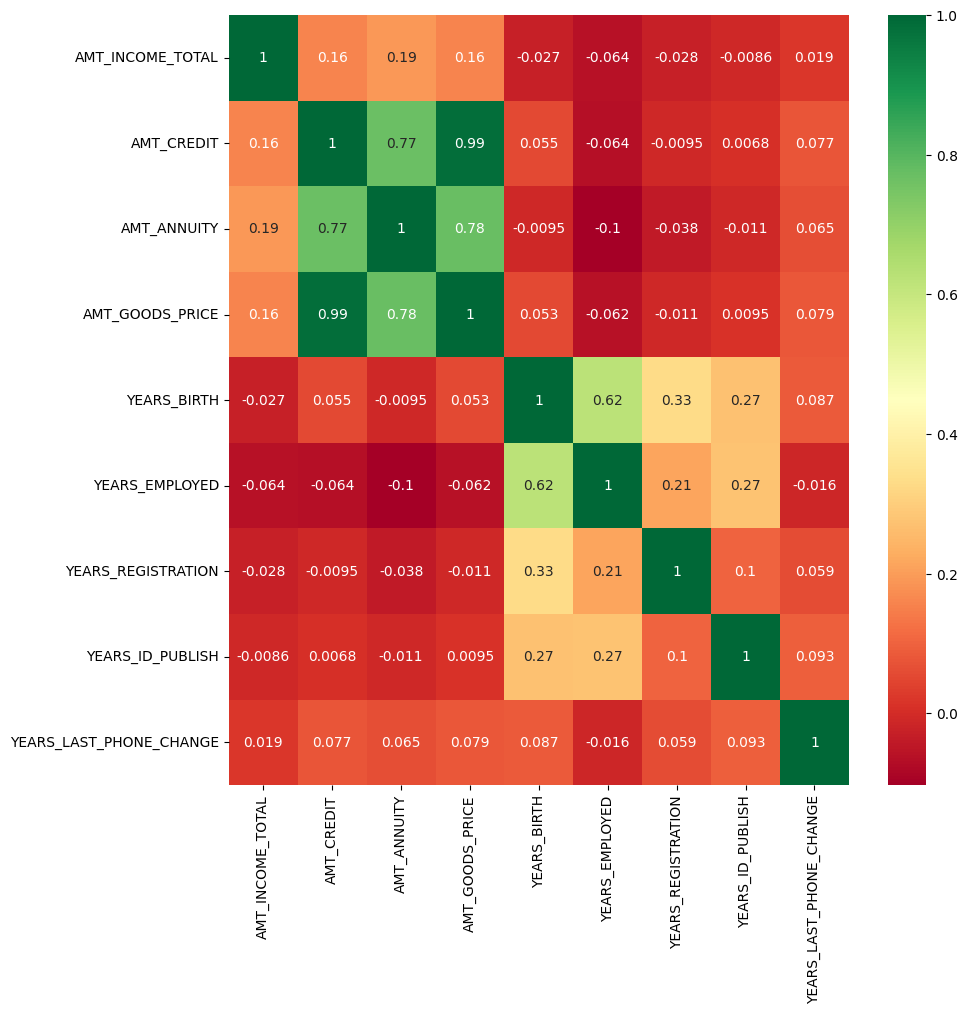

In [54]:
corr_data = ndf[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION", "YEARS_ID_PUBLISH", "YEARS_LAST_PHONE_CHANGE"]]
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(), annot=True, cmap="RdYlGn")
plt.show()

#now we will try to draw the same heat map of tar_0 and tar_1 and try to draw conclusions from that

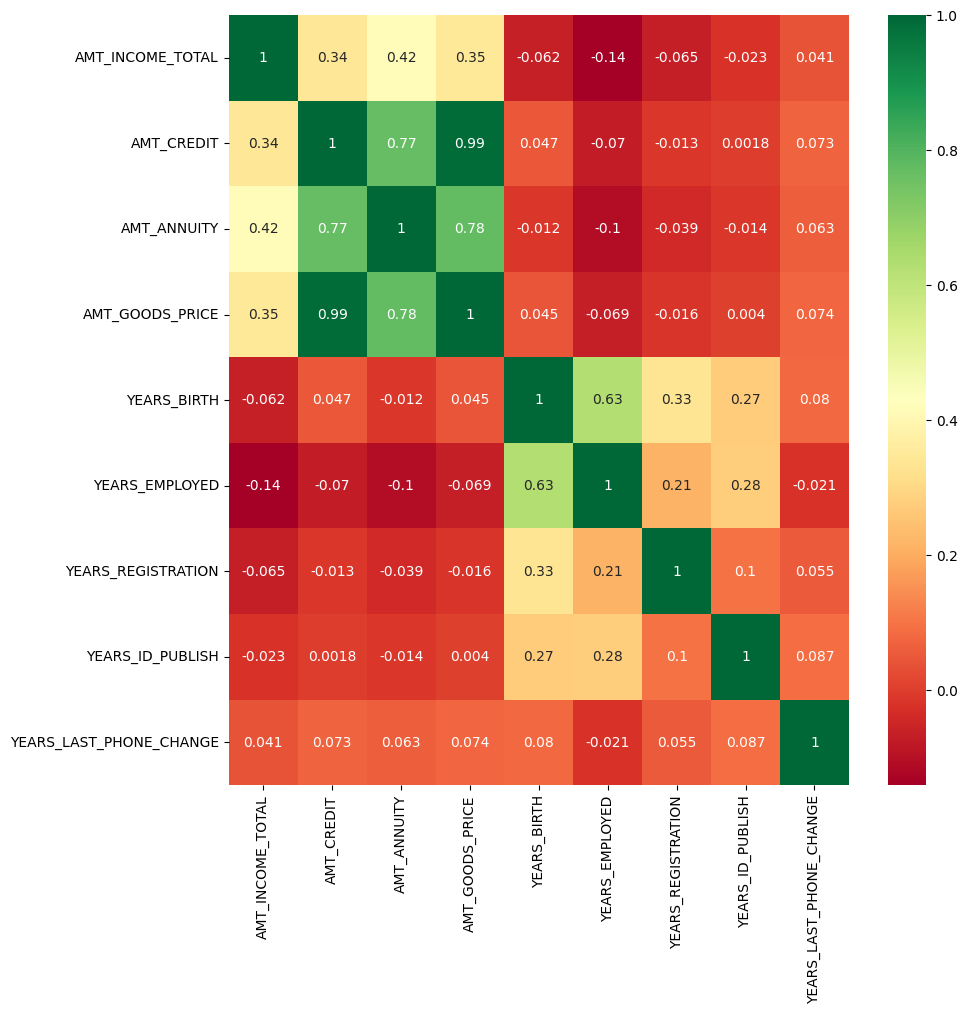

In [55]:
corr_data_0 = tar_0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION", "YEARS_ID_PUBLISH", "YEARS_LAST_PHONE_CHANGE"]]
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_0.corr(), annot=True, cmap="RdYlGn")
plt.show()

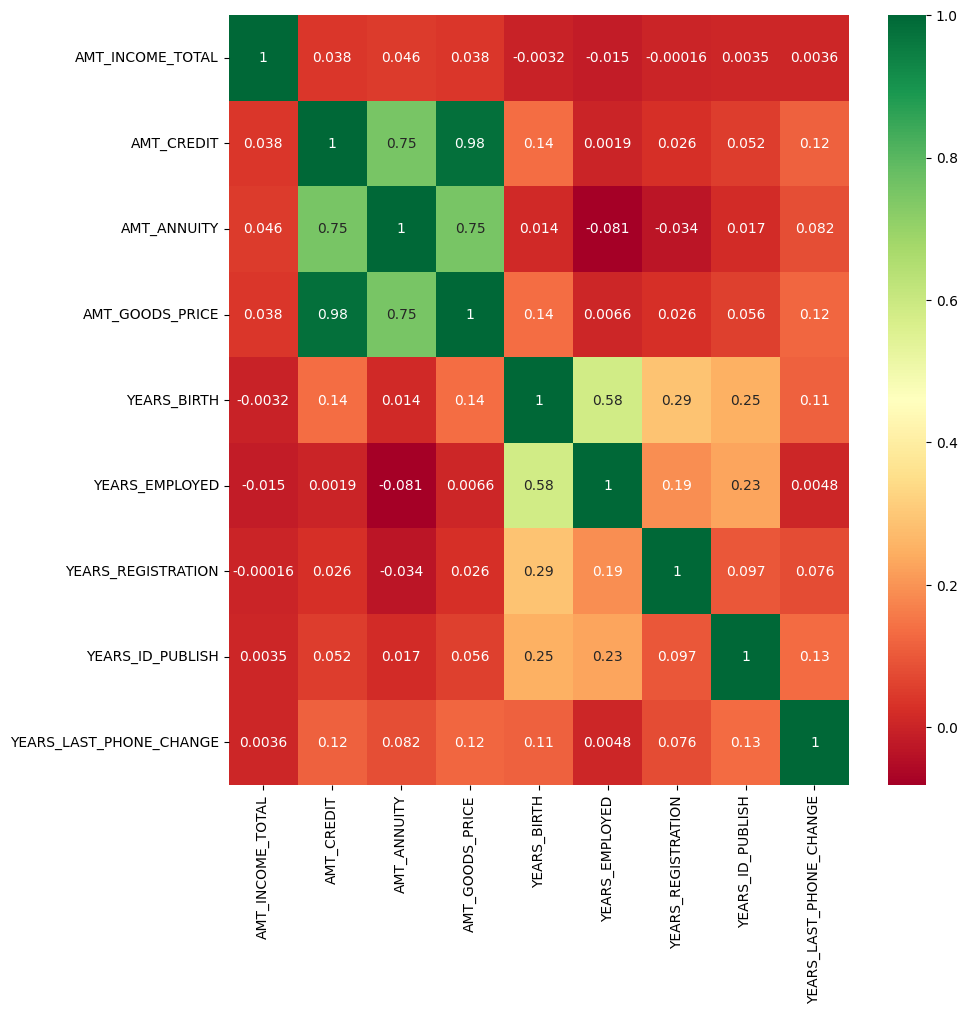

In [56]:
corr_data_1 = tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION", "YEARS_ID_PUBLISH", "YEARS_LAST_PHONE_CHANGE"]]
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_1.corr(), annot=True, cmap="RdYlGn")
plt.show()

#Conclusion
From the the above 2 heatmaps of tar_1 and tar_0 we can draw the following conclusions:
1. The corelation between AMT_CREDIT, AMT_GOODS_PRICE and AMT_ANNUITY with AMT_INCOME_TOTAL is very low in tar_1 as compared to tar_0.
2. YEARS_EMPLOYED and YEARS_BIRTH have a high correlation in both the heatmap but it is slightly higher in Tar_0
3. YEARS_LAST_PHONE_CHANGE has a higher correlation in tar_1 than tar_0 with YEARS_ID_PUBLISHED, AMT_GOODS_PRICE, AMT_CREDIT


In [57]:
app_data= pd.read_csv("/content/previous_application.csv")
app_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [58]:
app_data.shape

(1670214, 37)

#Data Quality Check

In [80]:
app_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP                0.000000
PRODUCT_COMBINATION             0.020716
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
dtype: float64

In [81]:
percentage = 49
threshold = int(((100 - percentage) / 100) * app_data.shape[0]+1)
pdf = app_data.dropna(thresh=threshold, axis=1)
pdf.shape

(1670214, 32)

Impute Value

In [83]:
for col in pdf.columns:
  if pdf[col].dtypes == np.int64 or pdf[col].dtypes == np.float64:
    pdf[col] = pdf[col].apply(lambda x: abs(x))

Are there is any null values???

In [84]:
null_cols = list( pdf.columns[pdf.isna().any()])
len(null_cols)

11

In [85]:
pdf.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP                0.000000
PRODUCT_COMBINATION             0.020716
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
dtype: float64

In [86]:
pdf["AMT_CREDIT_BINNED"] = pd.cut(
    pdf.AMT_CREDIT.fillna(-1),  # So NaNs are in a separate bin
    bins=[-2, 200000, 500000, 1000000, 2000000, np.inf],
    labels=['Very Low Credit', 'Low Credit', 'Medium Credit', 'High Credit', 'Very High Credit']
)

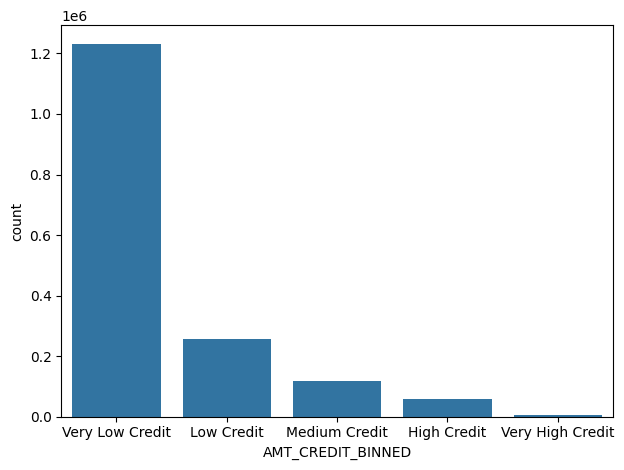

In [87]:
sns.countplot(x=pdf["AMT_CREDIT_BINNED"])
plt.tight_layout()
plt.show()

In [88]:
pdf["AMT_GOODS_PRICE_CATEGORY"] = pd.qcut(
    pdf.AMT_GOODS_PRICE.fillna(-1),
    q=[0, 0.25, 0.45, 0.65, 0.85, 1],
    labels=['Very Low Price', 'Low Price', 'Medium Price', 'High Price', 'Very High Price']
)

In [89]:
pdf["AMT_GOODS_PRICE"].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

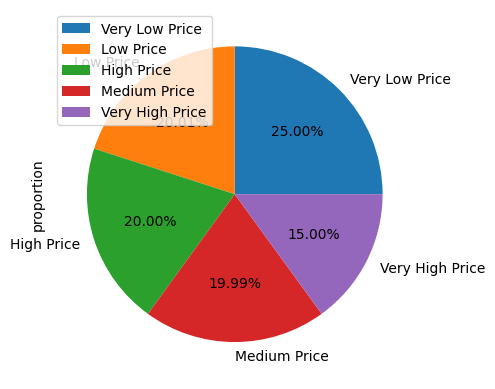

In [90]:
pdf["AMT_GOODS_PRICE_CATEGORY"].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show()

Now we will divide the data based on if the loan was approved or not (NAME_CONTRACT_STATUS) like we did for tar_0 and tar_1

In [91]:
approved = pdf[pdf.NAME_CONTRACT_STATUS == 'Approved']
cancelled = pdf[pdf.NAME_CONTRACT_STATUS == 'Canceled']
refused = pdf[pdf.NAME_CONTRACT_STATUS == 'Refused']
unused = pdf[pdf.NAME_CONTRACT_STATUS == 'Unused offer']

In [92]:
pdf.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64

In [93]:
cat_cols_2 = list(pdf.columns[pdf.dtypes == object])
num_cols_2 = list(pdf.columns[pdf.dtypes == np.int64]) + list(pdf.columns[pdf.dtypes == np.float64])


Now we  can remove the not-so-important columns for cat_col and num_col

In [94]:
cat_cols_2= ["NAME_CONTRACT_TYPE",'WEEKDAY_APPR_PROCESS_START',"NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE","NAME_CLIENT_TYPE","NAME_SELLER_INDUSTRY",'CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']

In [95]:
num_cols_2 = ['HOUR_APPR_PROCESS_START','DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']

NAME_CONTRACT_TYPE
Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: proportion, dtype: float64


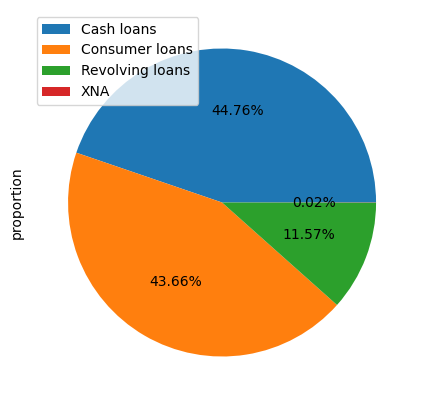

WEEKDAY_APPR_PROCESS_START
TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: proportion, dtype: float64


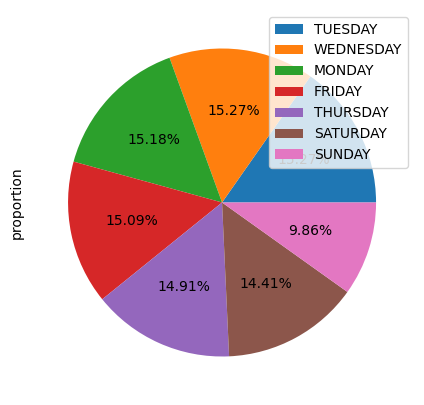

NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64


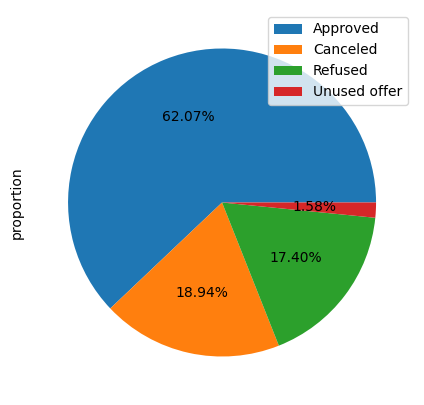

NAME_PAYMENT_TYPE
Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: proportion, dtype: float64


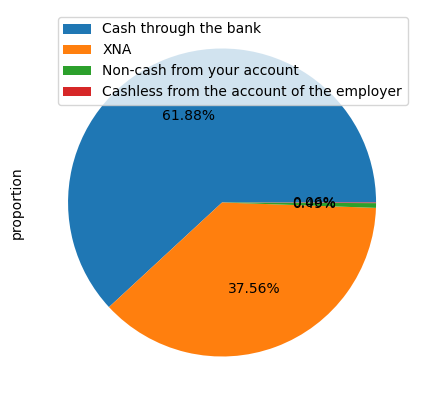

NAME_CLIENT_TYPE
Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: proportion, dtype: float64


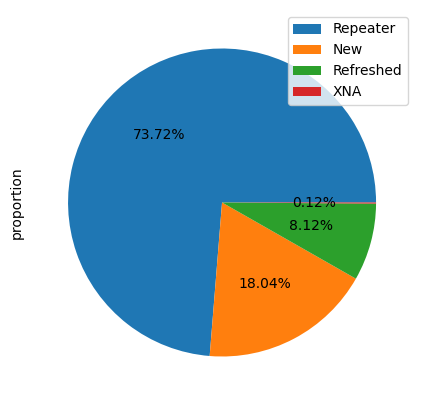

NAME_SELLER_INDUSTRY
XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: proportion, dtype: float64


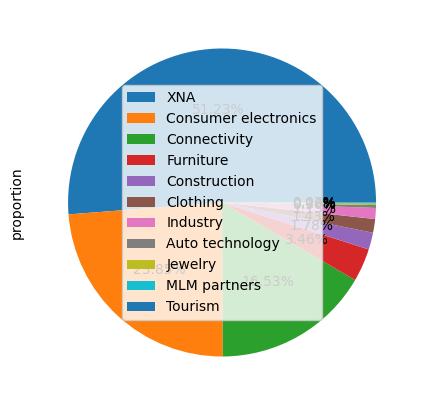

CHANNEL_TYPE
Credit and cash offices       43.106332
Country-wide                  29.618360
Stone                         12.697954
Regional / Local               6.497850
Contact center                 4.268734
AP+ (Cash loan)                3.415490
Channel of corporate sales     0.368216
Car dealer                     0.027062
Name: proportion, dtype: float64


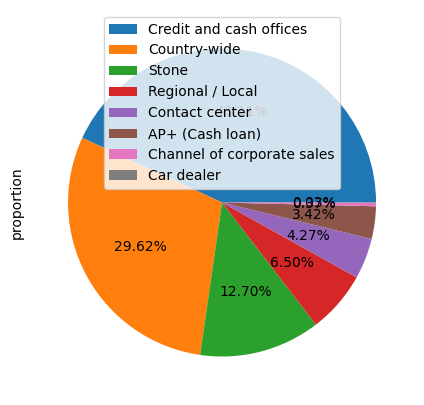

NAME_SELLER_INDUSTRY
XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: proportion, dtype: float64


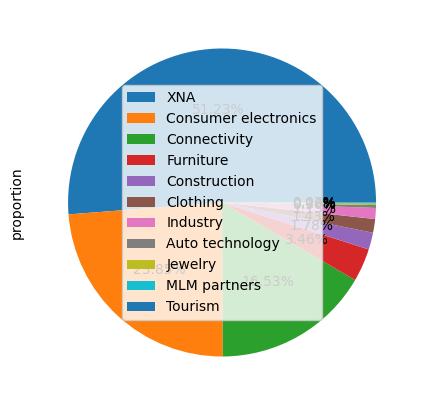

NAME_YIELD_GROUP
XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: proportion, dtype: float64


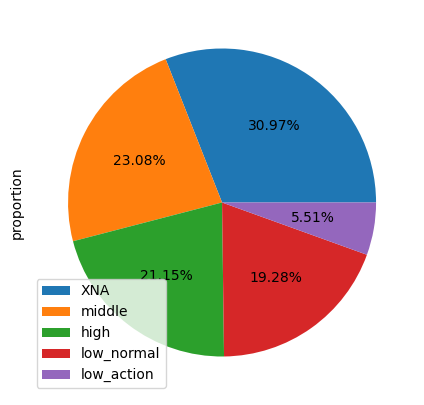

PRODUCT_COMBINATION
Cash                              17.126503
POS household with interest       15.786996
POS mobile with interest          13.214817
Cash X-Sell: middle                8.616430
Cash X-Sell: low                   7.799898
Card Street                        6.741970
POS industry with interest         5.918612
POS household without interest     4.964943
Card X-Sell                        4.825651
Cash Street: high                  3.571480
Cash X-Sell: high                  3.551239
Cash Street: middle                2.075493
Cash Street: low                   2.026148
POS mobile without interest        1.442150
POS other with interest            1.429993
POS industry without interest      0.754670
POS others without interest        0.153006
Name: proportion, dtype: float64


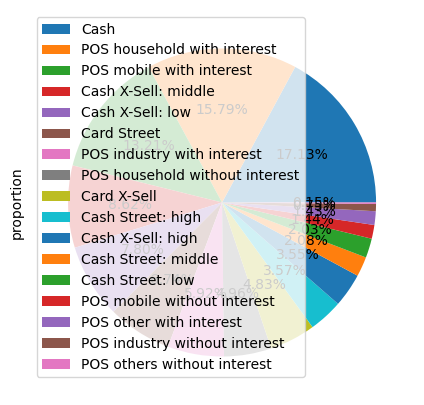

In [96]:
for col in cat_cols_2:
  print(pdf[col].value_counts(normalize=True)*100)
  plt.figure(figsize=(5,5))
  pdf[col].value_counts(normalize=True).plot.pie(labeldistance=None,autopct = '%1.2f%%')
  plt.legend()
  plt.show()

Bivariate and Multivariate analysis\
WEEKDAY_APPR_PROCESS_START VS AMT_APPLICATION

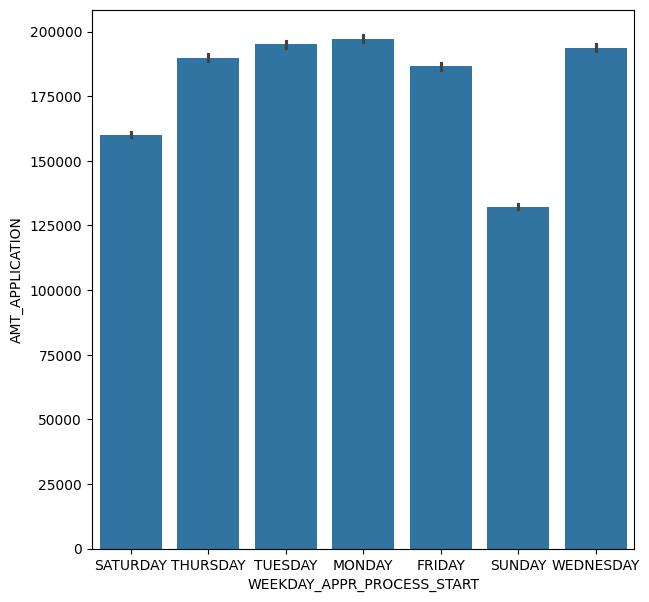

In [98]:
plt.figure(figsize=(7,7))
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=approved)
plt.show()

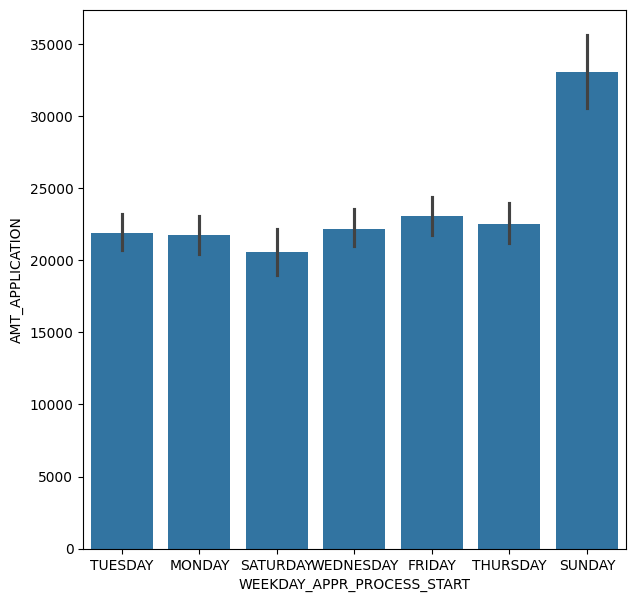

In [99]:
plt.figure(figsize=(7,7))
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=cancelled)
plt.show()

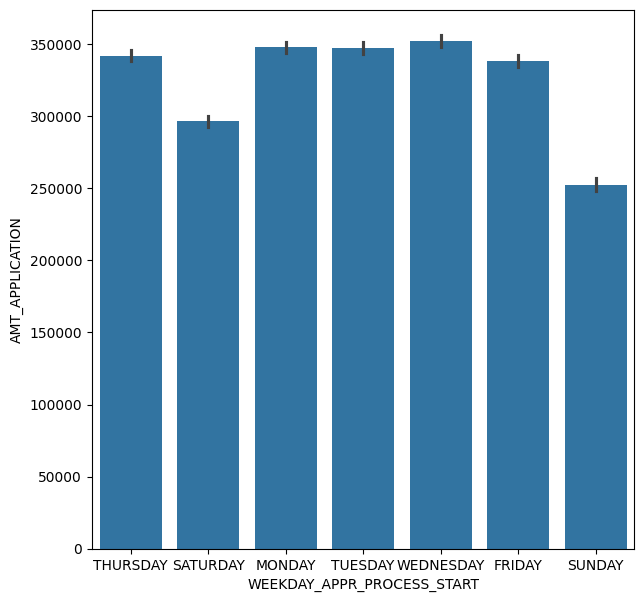

In [100]:
plt.figure(figsize=(7,7))
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=refused)
plt.show()

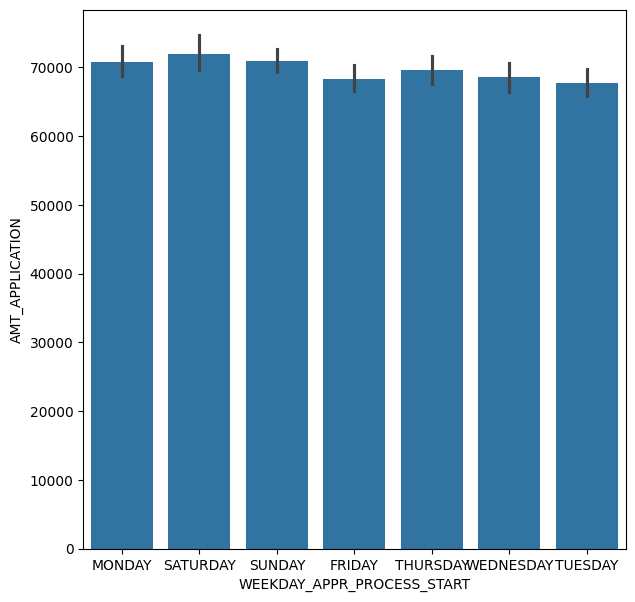

In [101]:
plt.figure(figsize=(7,7))
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=unused)
plt.show()

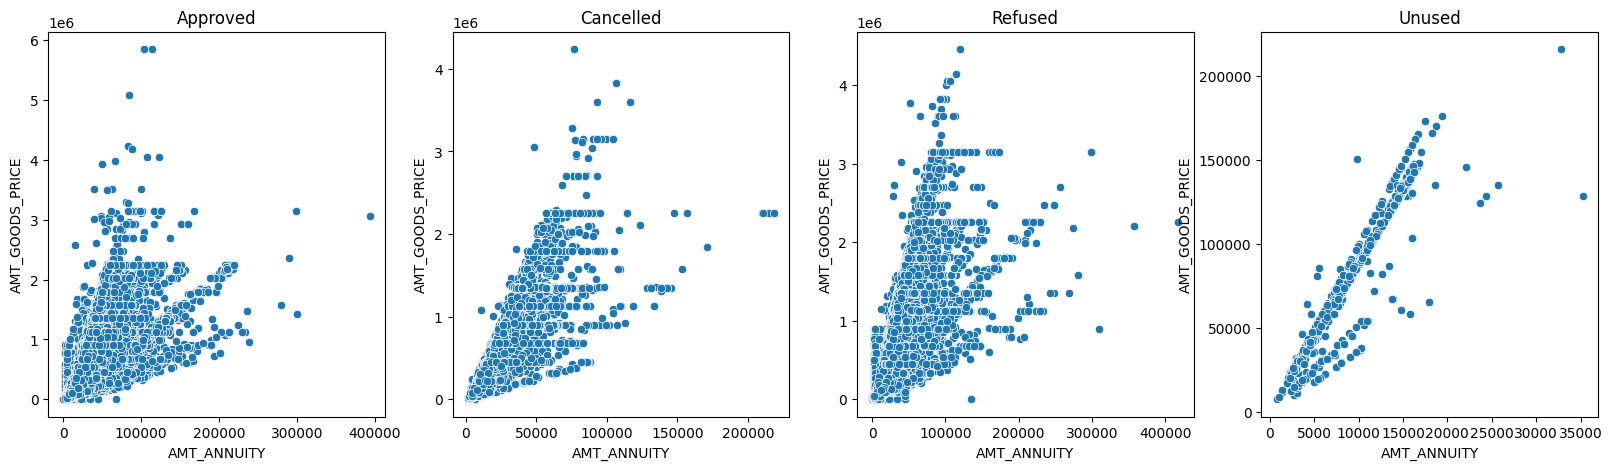

In [102]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title("Approved")
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=approved)
plt.subplot(1,4,2)
plt.title("Cancelled")
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=cancelled)
plt.subplot(1,4,3)
plt.title("Refused")
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=refused)
plt.subplot(1,4,4)
plt.title("Unused")
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=unused)
plt.show()

In [103]:
corr_approved = approved[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT', 'AMT_GOODS_PRICE','CNT_PAYMENT']]
corr_cancelled = cancelled[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT', 'AMT_GOODS_PRICE','CNT_PAYMENT']]
corr_refused = refused[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT', 'AMT_GOODS_PRICE','CNT_PAYMENT']]
corr_unused = unused[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT', 'AMT_GOODS_PRICE','CNT_PAYMENT']]

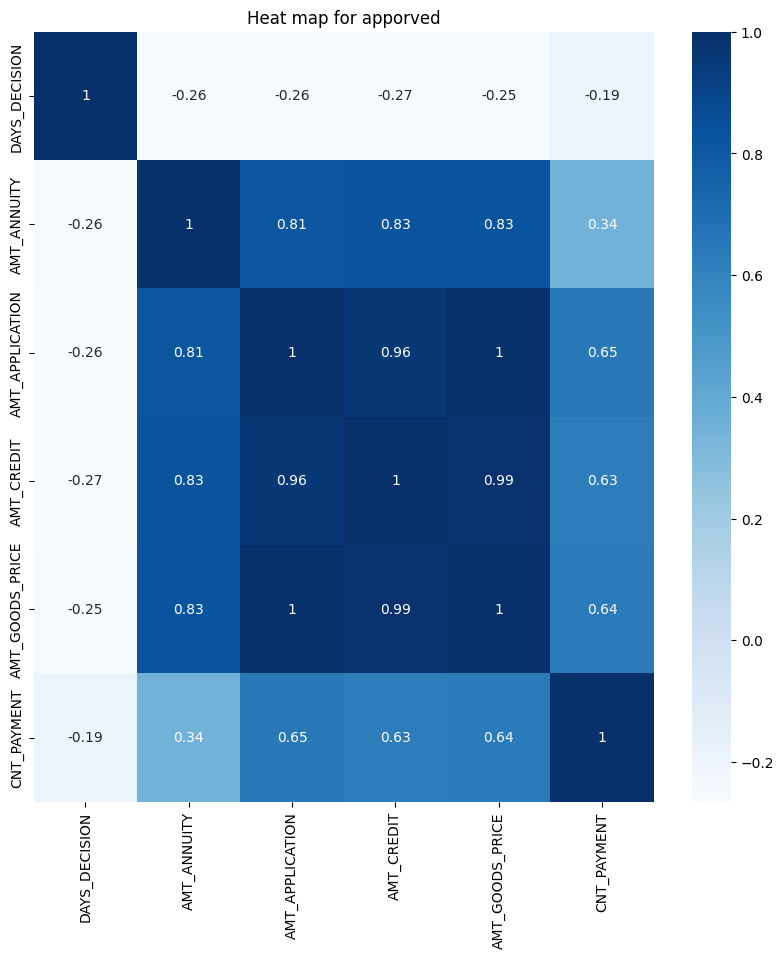

In [104]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_approved.corr(),annot=True,cmap="Blues")
plt.title("Heat map for apporved")
plt.show()

Conclusion
1. Days_decision seems to have anegative correlation with all the other columns.
2. AMT_APPLICATION and AMT_GOODS_PRICE have a very high correlation with each other.
3. AMT_CREDIT and AMT_GOODS_PRICE have a very high correlation with each other.

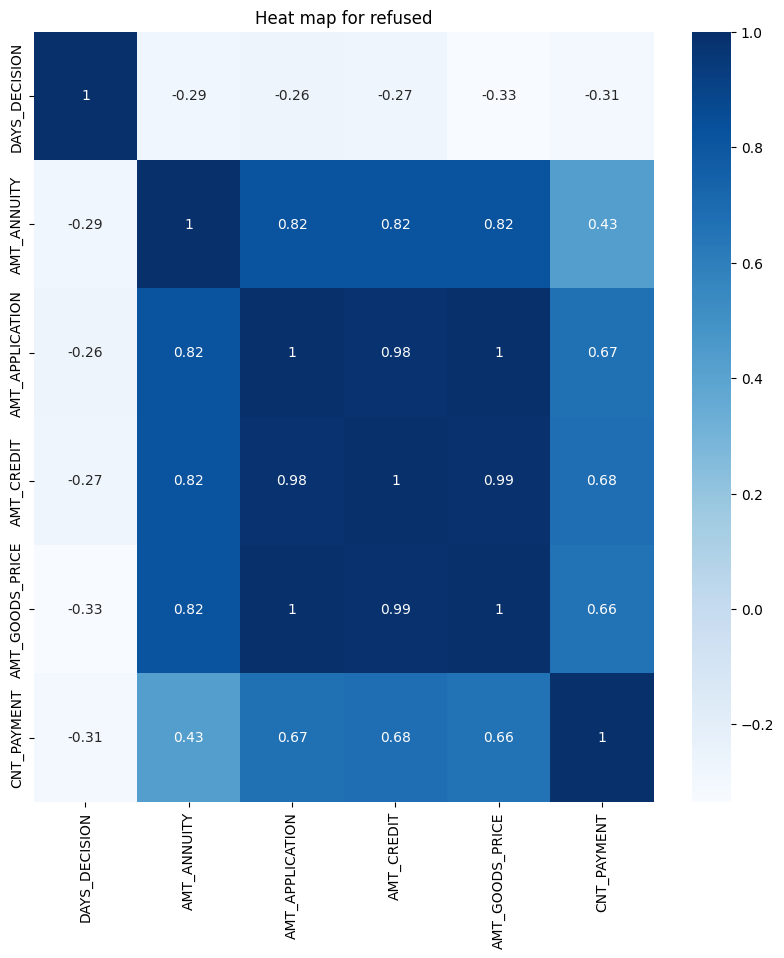

In [105]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_refused.corr(),annot=True,cmap="Blues")
plt.title("Heat map for refused")
plt.show()

Conclusion
1. Days_decision seems to have anegative correlation with all the other columns.
2. AMT_APPLICATION and AMT_GOODS_PRICE have a very high correlation with each other.
3. AMT_CREDIT and AMT_GOODS_PRICE have a very high correlation with each other.

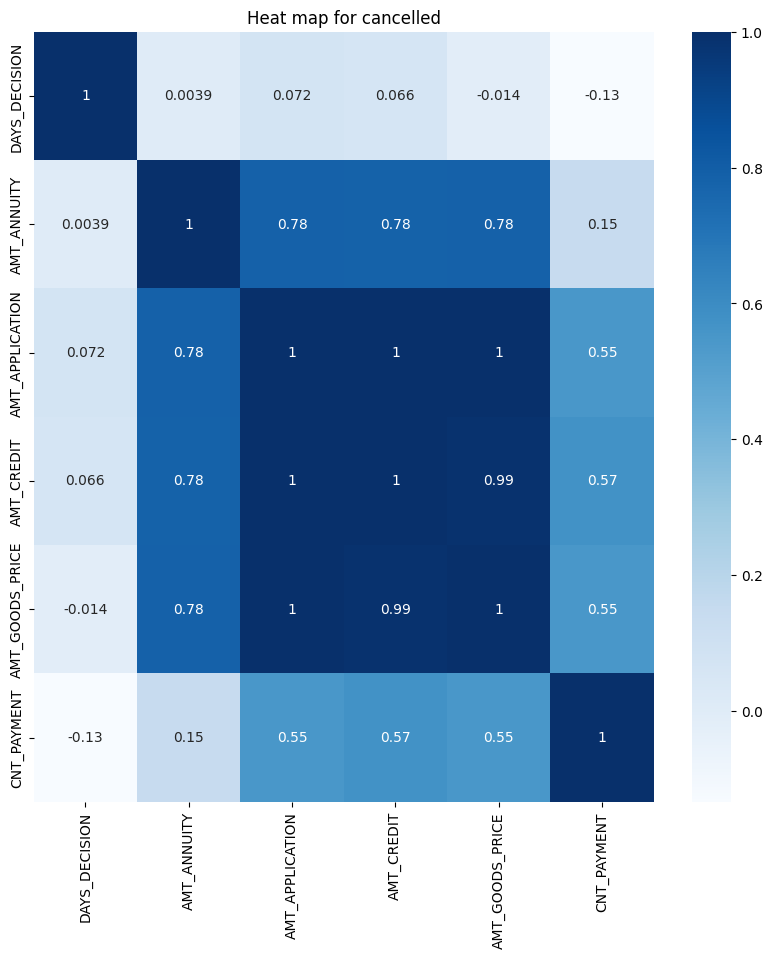

In [106]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_cancelled.corr(),annot=True,cmap="Blues")
plt.title("Heat map for cancelled")
plt.show()

Conclusion
1. Days_decision seems to have anegative correlation with all the other columns.
2. AMT_APPLICATION and AMT_GOODS_PRICE have a very high correlation with each other.
3. AMT_CREDIT and AMT_GOODS_PRICE have a very high correlation with each other.

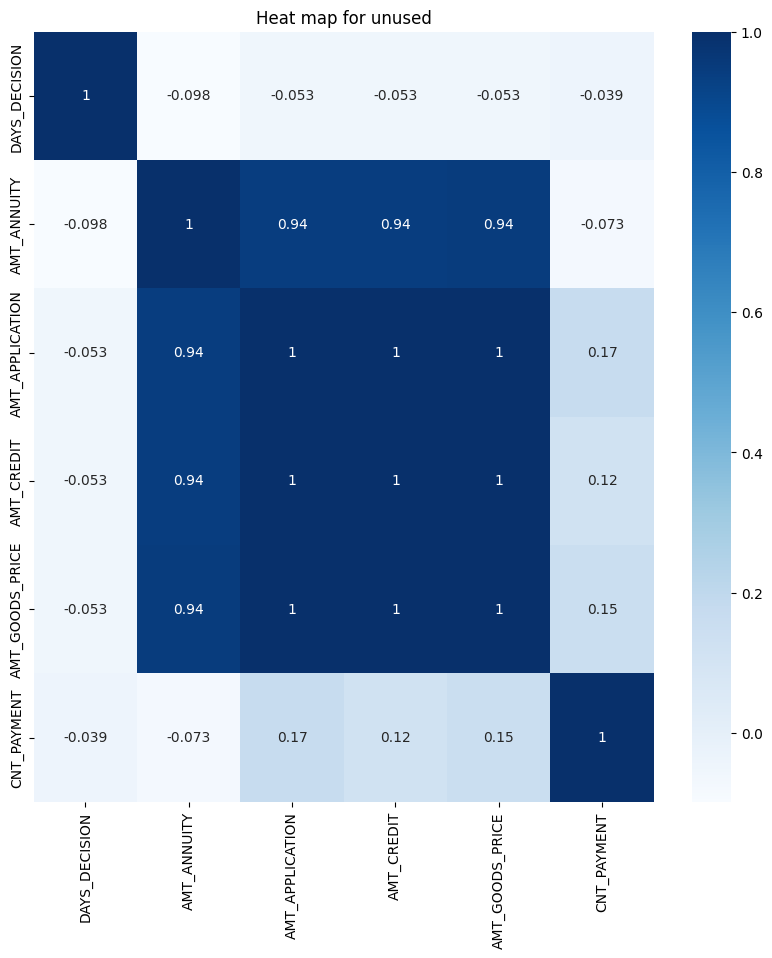

In [107]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_unused.corr(),annot=True,cmap="Blues")
plt.title("Heat map for unused")
plt.show()

Conclusion
1. Days_decision seems to have anegative correlation with all the other columns.
2. AMT_APPLICATION and AMT_GOODS_PRICE have a very high correlation with each other.
3. AMT_CREDIT and AMT_GOODS_PRICE have a very high correlation with each other.
4. CNT_PAYMENT seems to have correlation with no othr column.

##Merge Application and Previous application dataframes

In [108]:
merge_df = ndf.merge(pdf, on=['SK_ID_CURR'], how= 'left')

In [109]:
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [110]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 113 entries, SK_ID_CURR to AMT_GOODS_PRICE_CATEGORY
dtypes: category(4), float64(36), int64(46), object(27)
memory usage: 1.2+ GB


##Filtering columns for our analysis

In [111]:
for col in merge_df.columns:
  if col.startswith('FLAG'):
    merge_df.drop(columns=col, axis=1, inplace=True)

In [112]:
merge_df.shape

(1430155, 84)

In [115]:
res1 = pd.pivot_table(data=merge_df, index=["NAME_INCOME_TYPE","NAME_CLIENT_TYPE"], columns=['NAME_CONTRACT_STATUS'],values="TARGET", aggfunc="mean")
res1

NAME_CONTRACT_STATUS                   Approved  Canceled   Refused  \
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.083012  0.151452  0.096548   
                     Refreshed         0.059167  0.074328  0.105068   
                     Repeater          0.068442  0.084824  0.112279   
                     XNA               0.090909  0.084337  0.062500   
Maternity leave      New               1.000000       NaN       NaN   
                     Repeater          1.000000  1.000000  1.000000   
Pensioner            New               0.057211  0.112805  0.060098   
                     Refreshed         0.046378  0.058281  0.089165   
                     Repeater          0.051421  0.060693  0.078492   
                     XNA               0.010101  0.047872  0.116279   
State servant        New               0.061750  0.090226  0.047745   
                     Refreshed         0.044057  0.045317  0.083756   
                     Repeater          0.056430  0.072019  0.088759   
                     XNA               0.062500  0.023256  0.000000   
Student              New               0.000000       NaN       NaN   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.000000  0.000000  0.000000   
Unemployed           New               0.500000       NaN  0.500000   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.460000  0.687500  0.666667   
Working              New               0.104073  0.153177  0.135940   
                     Refreshed         0.077033  0.098898  0.134548   
                     Repeater          0.084077  0.111727  0.143000   
                     XNA               0.092593  0.141791  0.185897   

NAME_CONTRACT_STATUS                   Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                
Commercial associate New                   0.070485  
                     Refreshed             0.052774  
                     Repeater              0.068921  
                     XNA                   0.200000  
Maternity leave      New                        NaN  
                     Repeater              1.000000  
Pensioner            New                   0.062857  
                     Refreshed             0.044521  
                     Repeater              0.053645  
                     XNA                   0.000000  
State servant        New                   0.080357  
                     Refreshed             0.081967  
                     Repeater              0.067183  
                     XNA                   0.000000  
Student              New                        NaN  
                     Refreshed                  NaN  
                     Repeater                   NaN  
Unemployed           New                        NaN  
                     Refreshed                  NaN  
                     Repeater              0.000000  
Working              New                   0.102131  
                     Refreshed             0.085016  
                     Repeater              0.093989  
                     XNA                   0.100000

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='NAME_INCOME_TYPE-NAME_CLIENT_TYPE'>

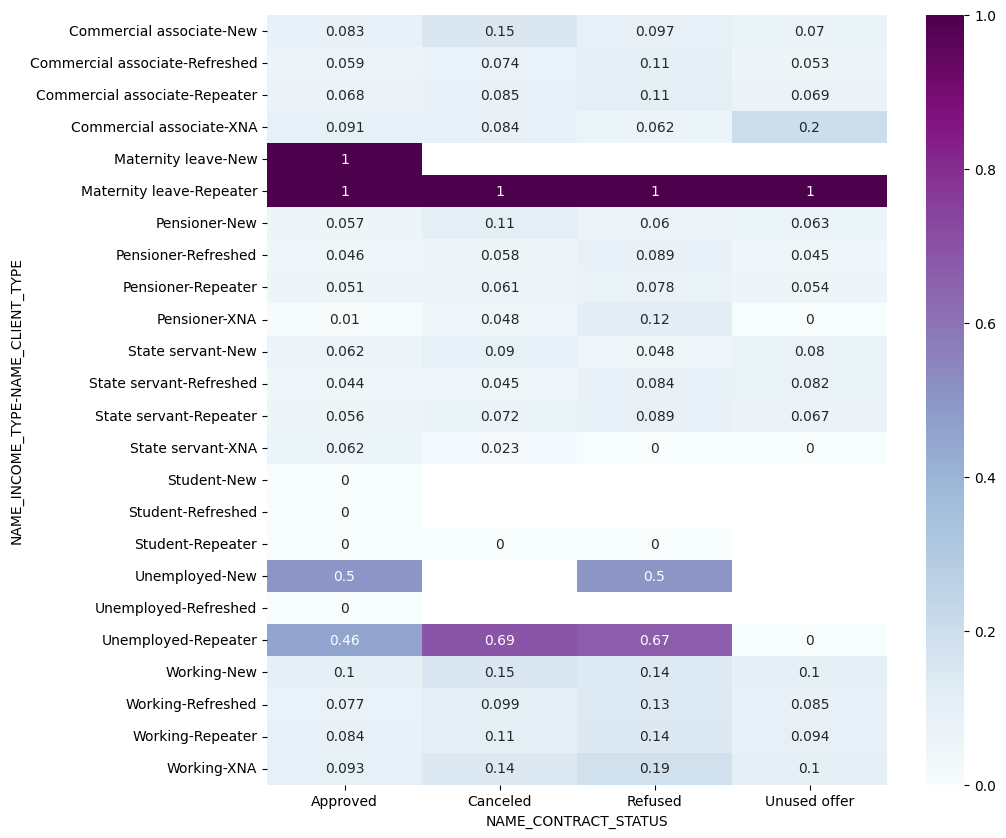

In [120]:
plt.figure(figsize=(10,10))
sns.heatmap(res1, annot=True,cmap="BuPu")

In [121]:
res2 = pd.pivot_table(data= merge_df, index=["CODE_GENDER","NAME_SELLER_INDUSTRY"], columns='TARGET', values="AMT_GOODS_PRICE_x", aggfunc='sum')

<Axes: xlabel='TARGET', ylabel='CODE_GENDER-NAME_SELLER_INDUSTRY'>

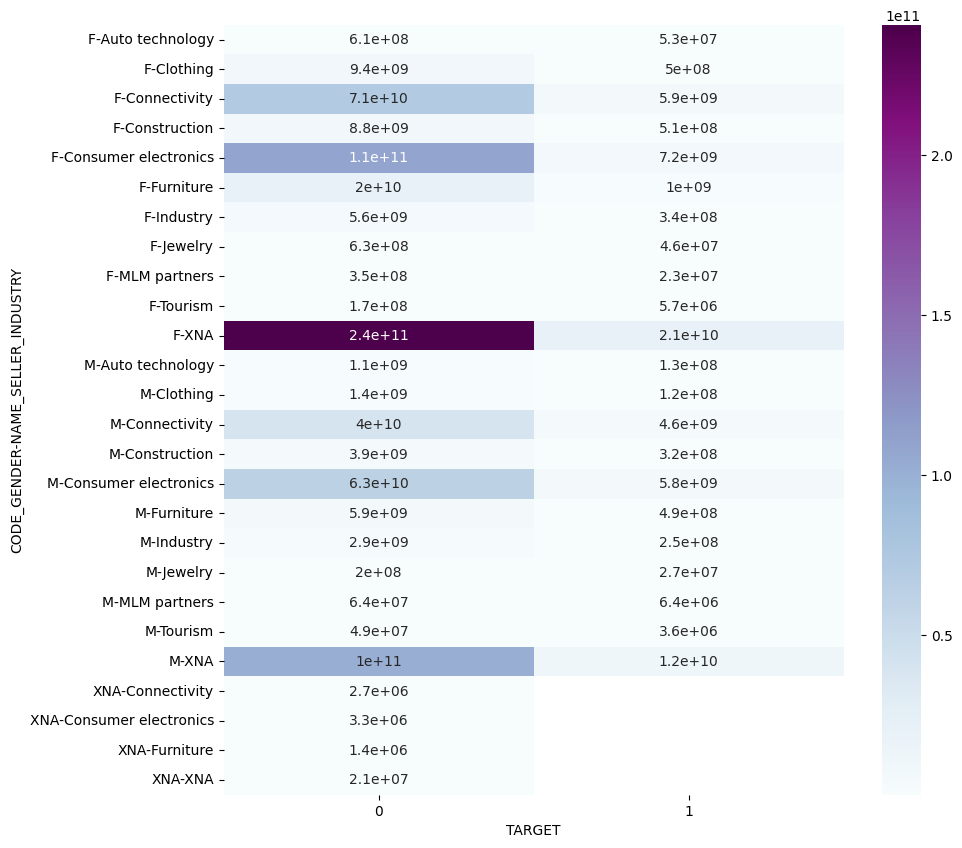

In [122]:
plt.figure(figsize=(10,10))
sns.heatmap(res2, annot=True,cmap="BuPu")